## Imports & Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings('ignore')

In [26]:
df = pd.read_csv('all_trial_results_2024-09-08.csv')

In [27]:
#df['history_provided'] = df['history_provided'].fillna('None')
df = df.dropna(subset='history_provided').reset_index(drop=True)

## Preliminary Analysis

### Utils

In [28]:
def choice_rate_heatmap(df: pd.DataFrame):
    choice_rate = df.groupby(['model_name', 'history_provided'])[['choice']].apply(lambda x: (x == 'B').mean()).reset_index()
    choice_pivot = choice_rate.pivot(columns='model_name', index='history_provided', values='choice')
    plt.figure(figsize=(10, 6))
    sns.heatmap(choice_pivot, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('B Choice Rate for each Model and History Combination')
    plt.show()

In [29]:
def choice_rate_graph(df: pd.DataFrame):
    choice_rate = df.groupby(['model_name', 'history_provided'])[['choice']].apply(lambda x: (x == 'B').mean()).reset_index()
    print(choice_rate)
    plt.figure(figsize=(10, 6))
    sns.barplot(x='history_provided', y='choice', hue='model_name', data=choice_rate, palette='coolwarm')
    plt.title('B Choice Rate for each Model and History Combination')
    plt.xlabel('History')
    plt.ylabel('Rate of Choice B')
    plt.show()

In [30]:
def temperature_breakdown(df: pd.DataFrame):
  choice_rate_temp = df.groupby(['model_name', 'history_provided', 'temperature'])[['choice']].apply(lambda x: (x == 'B').mean()).reset_index()
  choice_rate_temp['history_model'] = choice_rate_temp['model_name'] + ' - ' + choice_rate_temp['history_provided']
  plt.figure(figsize=(10, 6))
  sns.barplot(x='history_model', y='choice', hue='temperature', data=choice_rate_temp, palette='crest', dodge=True)
  plt.xticks(rotation=45, ha='right')
  plt.title('B Choice Rate for each Model and History Combination across Temperatures')
  plt.xlabel('Model - History')
  plt.ylabel('Rate of Choice B')
  plt.legend(title='Temperature')
  plt.show()

In [31]:
def outcomes(df: pd.DataFrame):
  outcomes = df.groupby(['model_name', 'history_provided'])[['outcome', 'alternative']].apply(lambda x: x.mean()).reset_index()
  print(outcomes)
  melted_df = outcomes.melt(id_vars=['model_name', 'history_provided'], value_vars=['outcome', 'alternative',], var_name='Type', value_name='Value')
  melted_df['history_model'] = melted_df['model_name'] + ' - ' + melted_df['history_provided']
  plt.figure(figsize=(10, 6))
  sns.barplot(x='history_model', y='Value', hue='Type', data=melted_df, palette='flare', dodge=True)
  plt.title('Outcomes for each History-Model Combination')
  plt.xticks(rotation=45, ha='right')
  plt.legend(title='Type')
  plt.xlabel('Model-History')
  plt.ylabel('Outcome')
  plt.show()

In [32]:
def plot_results(df: pd.DataFrame, exp_num: float, heatmap: bool = False):
    print(f'---------------------- Plotting Results for Experiment Number {exp_num} ----------------------')
    exp = df[df['prob_id'] == exp_num]
    choice_rate_graph(exp)
    if heatmap:
      choice_rate_heatmap(exp)
    temperature_breakdown(exp)
    outcomes(exp)

### Results

---------------------- Plotting Results for Experiment Number 1.0 ----------------------
         model_name history_provided    choice
0  gemini-1.5-flash             None  0.884355
1  gemini-1.5-flash              all  0.776721
2  gemini-1.5-flash             chat  0.892167
3       gpt-4o-mini              all  0.883833
4       gpt-4o-mini             chat  0.746667


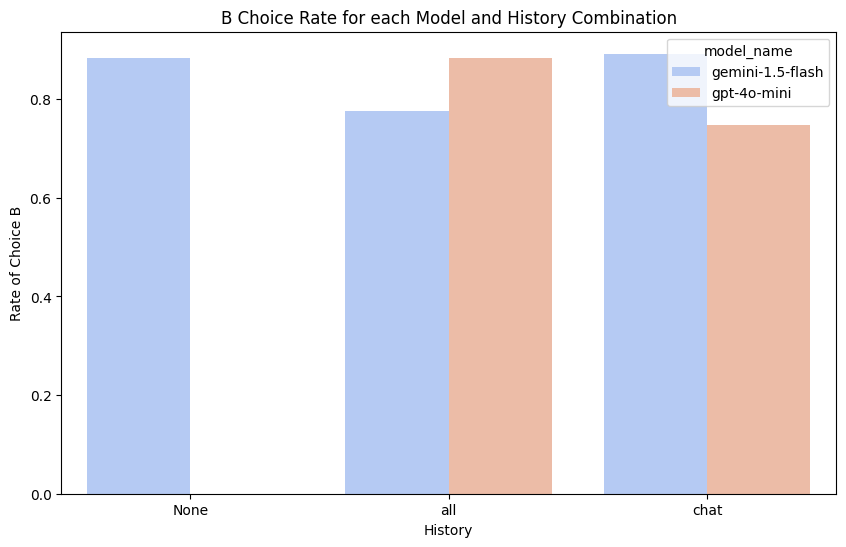

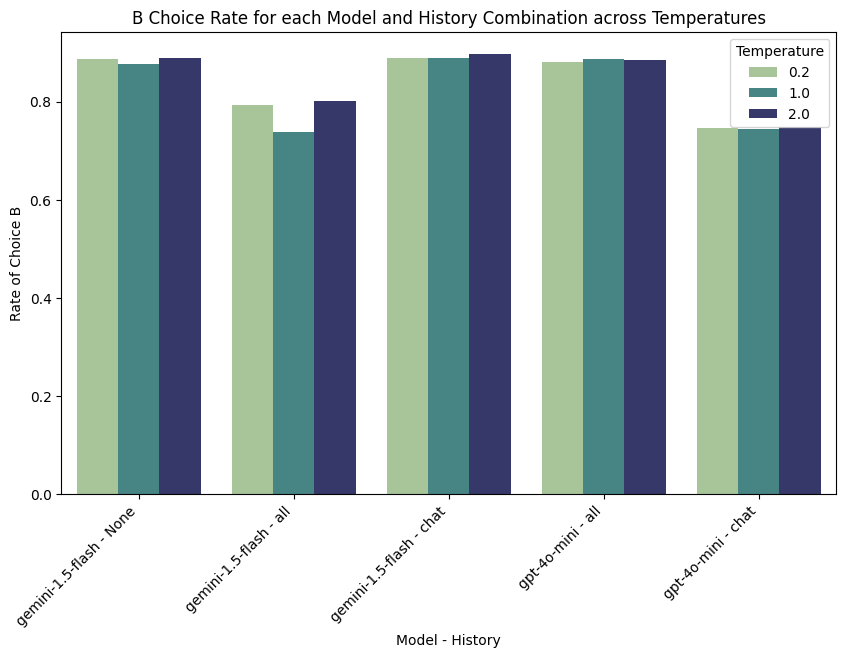

         model_name history_provided   outcome  alternative
0  gemini-1.5-flash             None -0.135645    -0.019355
1  gemini-1.5-flash              all -0.063607    -0.020164
2  gemini-1.5-flash             chat -0.085000    -0.027833
3       gpt-4o-mini              all -0.100667    -0.008500
4       gpt-4o-mini             chat -0.056333    -0.032667


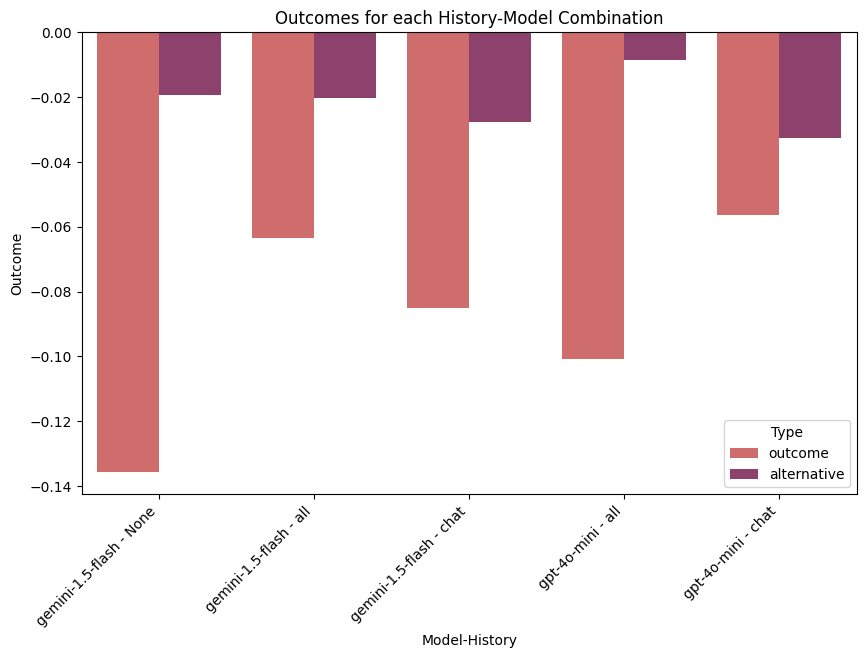

---------------------- Plotting Results for Experiment Number 2.0 ----------------------
         model_name history_provided    choice
0  gemini-1.5-flash             None  0.160462
1  gemini-1.5-flash              all  0.833333
2  gemini-1.5-flash             chat  0.212295
3       gpt-4o-mini              all  0.121803
4       gpt-4o-mini             chat  0.452000


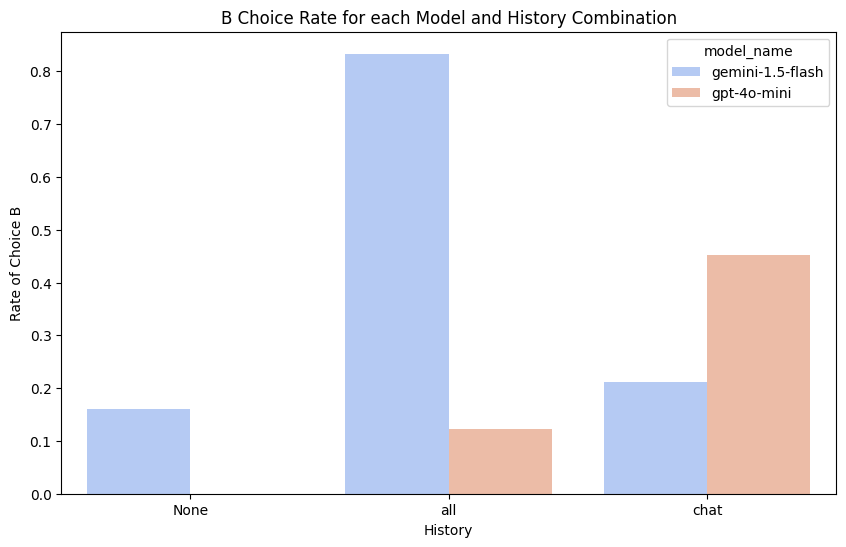

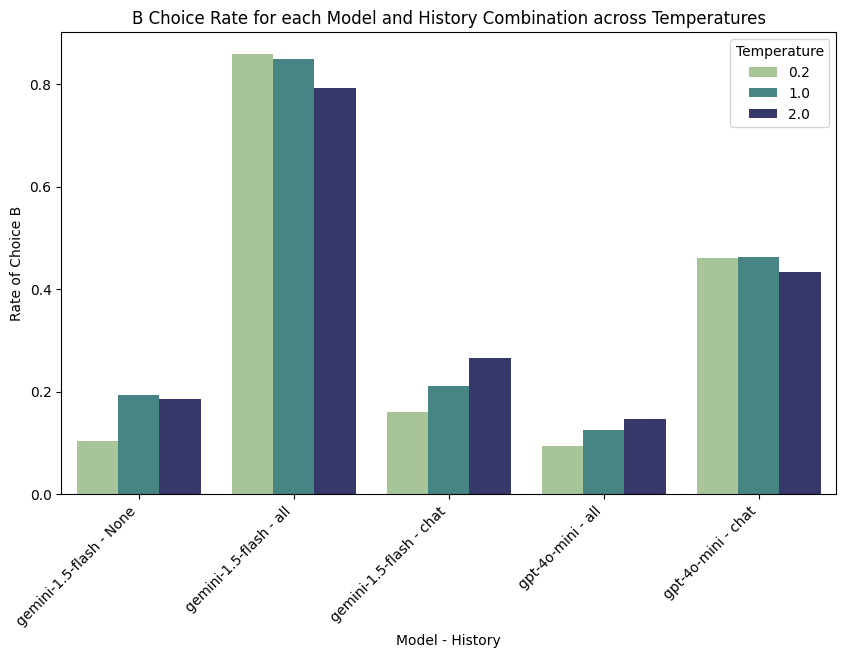

         model_name history_provided   outcome  alternative
0  gemini-1.5-flash             None  0.000308     0.114923
1  gemini-1.5-flash              all -0.012000     0.025833
2  gemini-1.5-flash             chat  0.004098     0.124754
3       gpt-4o-mini              all  0.000820     0.090164
4       gpt-4o-mini             chat  0.022833     0.134000


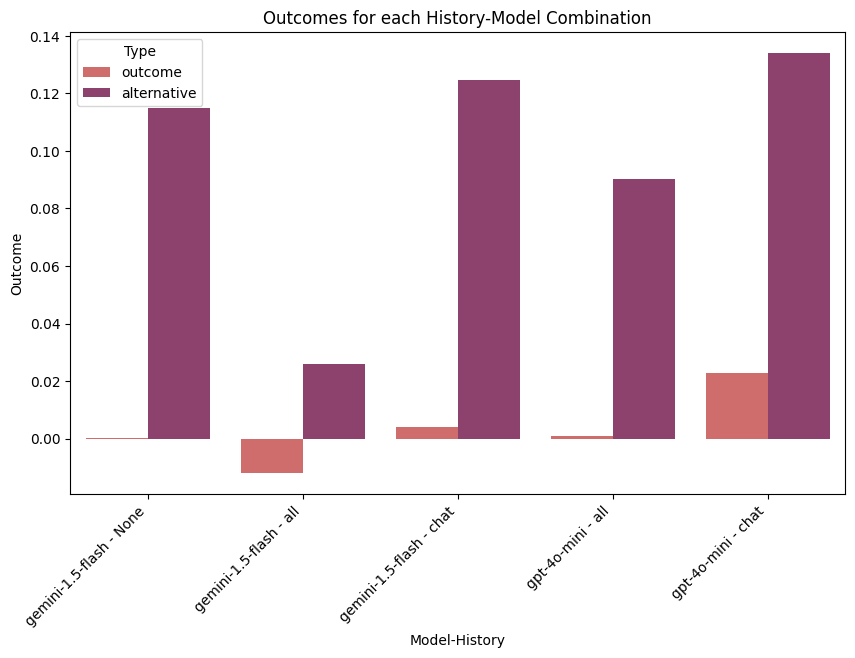

---------------------- Plotting Results for Experiment Number 3.0 ----------------------
         model_name history_provided    choice
0  gemini-1.5-flash             None  0.667188
1  gemini-1.5-flash              all  0.983167
2  gemini-1.5-flash             chat  0.661639
3       gpt-4o-mini              all  0.691667
4       gpt-4o-mini             chat  0.503279


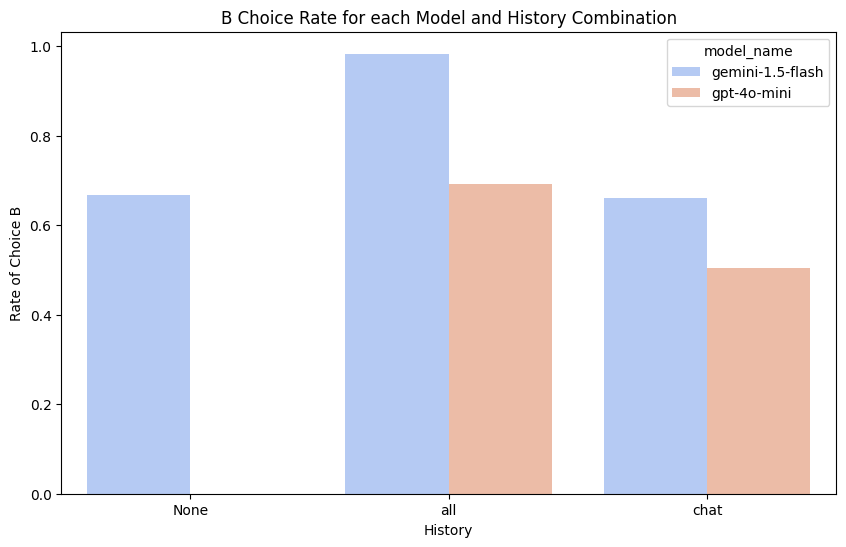

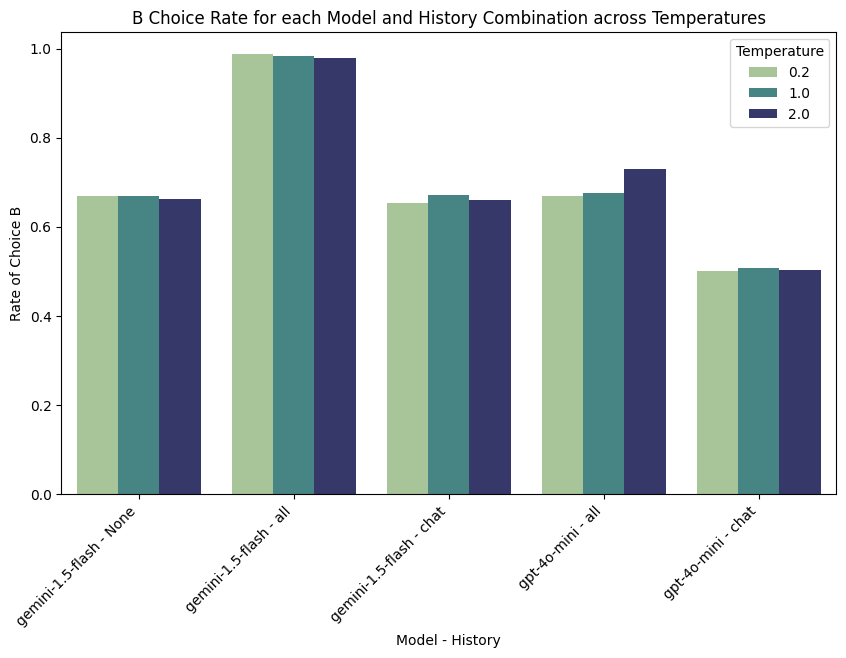

         model_name history_provided   outcome  alternative
0  gemini-1.5-flash             None  4.071094     3.564844
1  gemini-1.5-flash              all  4.530500     3.064500
2  gemini-1.5-flash             chat  3.929508     3.477049
3       gpt-4o-mini              all  4.004000     3.448500
4       gpt-4o-mini             chat  3.717541     3.718525


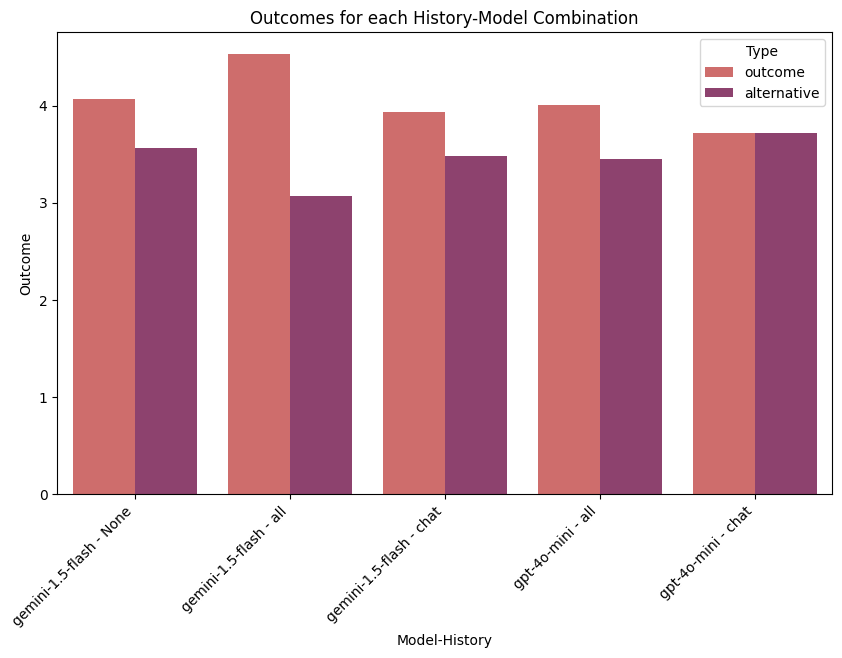

---------------------- Plotting Results for Experiment Number 4.0 ----------------------
         model_name history_provided    choice
0  gemini-1.5-flash             None  0.498500
1  gemini-1.5-flash              all  0.904426
2  gemini-1.5-flash             chat  0.494918
3       gpt-4o-mini              all  0.622459
4       gpt-4o-mini             chat  0.462167


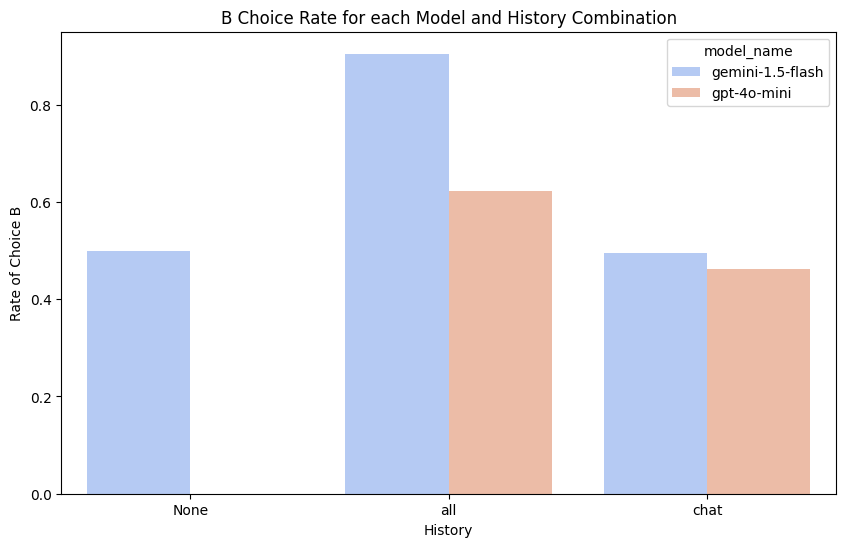

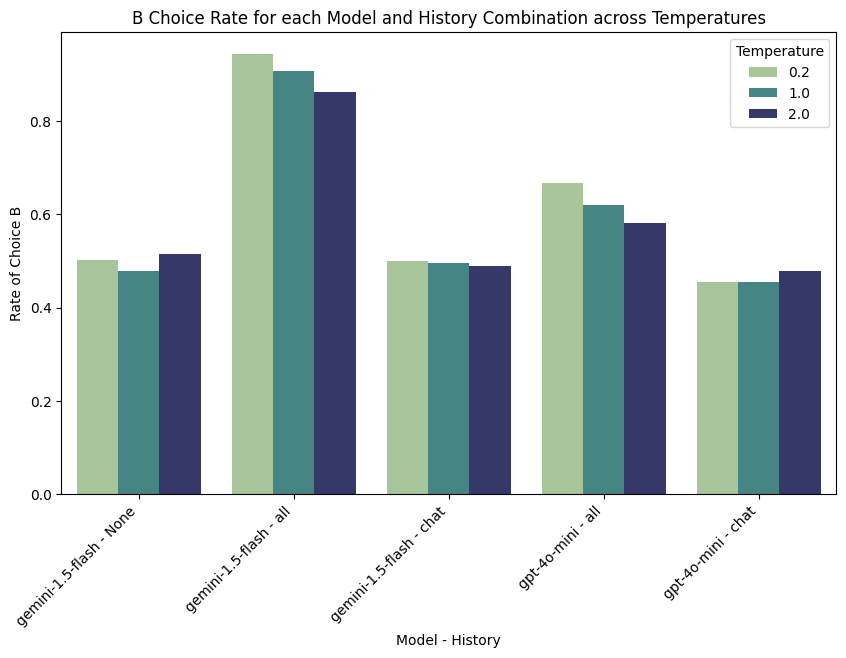

         model_name history_provided   outcome  alternative
0  gemini-1.5-flash             None  3.446000     3.549333
1  gemini-1.5-flash              all  3.911148     3.095410
2  gemini-1.5-flash             chat  3.489508     3.501967
3       gpt-4o-mini              all  3.631148     3.360984
4       gpt-4o-mini             chat  3.453000     3.554333


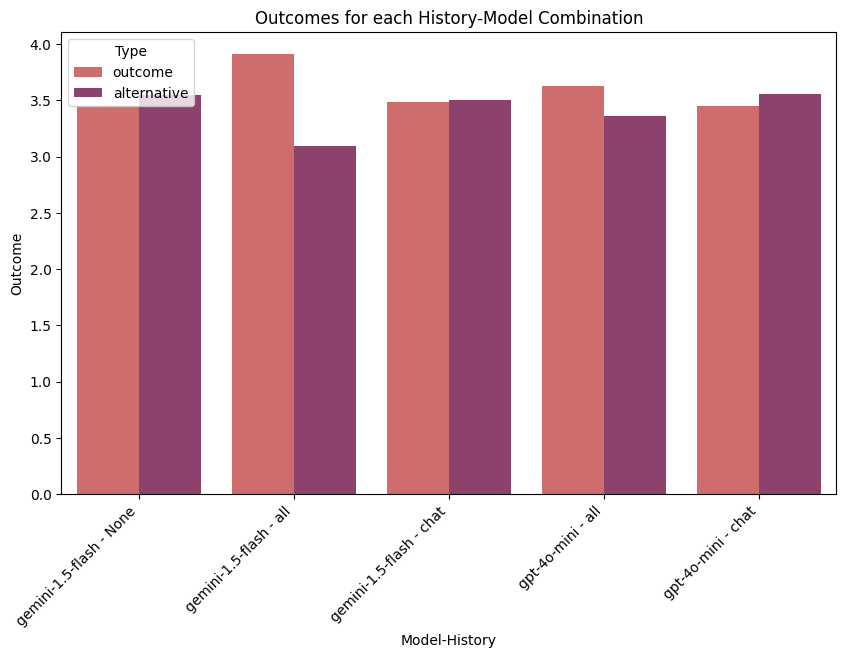

In [9]:
for exp_num in sorted(df['prob_id'].unique()):
    plot_results(df, exp_num, heatmap=False)

For Problem 1.0, the rare event (-10.0) occured 1974 times, at a rate of 0.09933, for the 19874 instances in which B was chosen.
The total number of occurences was 2407, at a rate of 0.09988


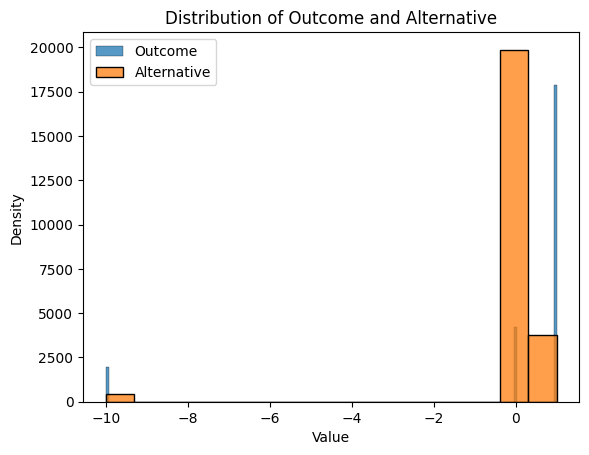


For Problem 2.0, the rare event (10.0) occured 895 times, at a rate of 0.09179, for the 9750 instances in which B was chosen.
The total number of occurences was 2415, at a rate of 0.09979


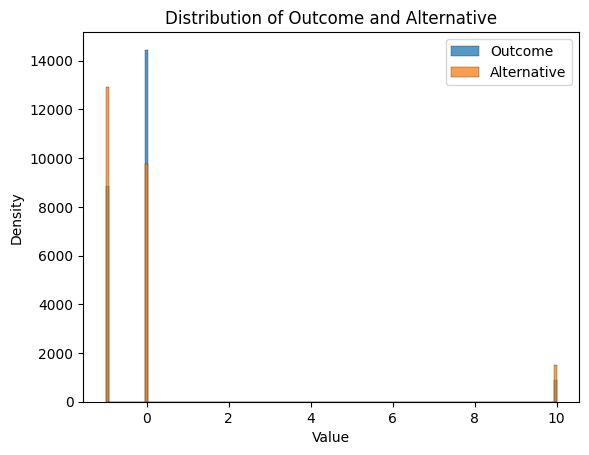

In [ ]:
probs = [1.0, 2.0]
for prob in probs:
  t = df[df['prob_id'] == prob]
  rare_event = t[(t['choice'] == 'B') & (t['outcome'] == t['b2'])]
  not_chosen = t[(t['choice'] == 'A') & (t['alternative'] == t['b2'])]
  print(f'For Problem {prob}, the rare event ({t["b2"].unique()[0]}) occured {len(rare_event)} times, at a rate of {round(len(rare_event)/len(t[t["choice"]=="B"]), 5)}, for the {len(t[t["choice"] == "B"])} instances in which B was chosen.')
  print(f'The total number of occurences was {len(rare_event)+len(not_chosen)}, at a rate of {round((len(rare_event)+len(not_chosen))/len(t), 5)}')

  sns.histplot(t['outcome'], label='Outcome', fill=True)
  sns.histplot(t['alternative'], label='Alternative', fill=True)
  plt.title('Distribution of Outcome and Alternative')
  plt.xlabel('Value')
  plt.ylabel('Density')
  plt.legend()
  plt.show()
  print('')


For Problem 3.0, the higher-payoff event (9.0) occured 8508 times, at a rate of 0.49595, for the 17155 instances in which B was chosen.
The total number of occurences was 12055, at a rate of 0.49814


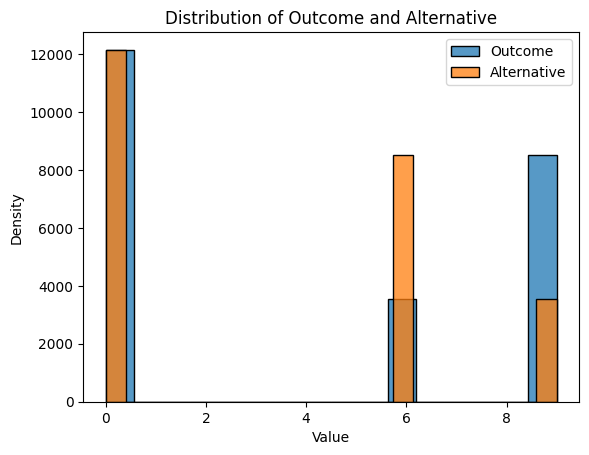



For Problem 4.0, the higher-payoff event (8.0) occured 7550 times, at a rate of 0.4998, for the 15106 instances in which B was chosen.
The total number of occurences was 12142, at a rate of 0.49967


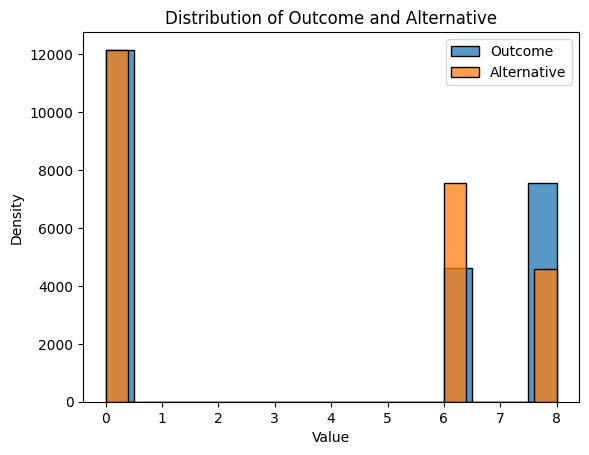

In [ ]:
alt_probs = [3.0, 4.0]
for prob in alt_probs:
  t = df[df['prob_id'] == prob]
  rare_event = t[(t['choice'] == 'B') & (t['outcome'] == t['b1'])]
  not_chosen = t[(t['choice'] == 'A') & (t['alternative'] == t['b1'])]
  print(f'For Problem {prob}, the higher-payoff event ({t["b1"].unique()[0]}) occured {len(rare_event)} times, at a rate of {round(len(rare_event)/len(t[t["choice"]=="B"]), 5)}, for the {len(t[t["choice"] == "B"])} instances in which B was chosen.')
  print(f'The total number of occurences was {len(rare_event)+len(not_chosen)}, at a rate of {round((len(rare_event)+len(not_chosen))/len(t), 5)}')

  sns.histplot(t['outcome'], label='Outcome', fill=True)
  sns.histplot(t['alternative'], label='Alternative', fill=True)
  plt.title('Distribution of Outcome and Alternative')
  plt.xlabel('Value')
  plt.ylabel('Density')
  plt.legend()
  plt.show()
  print('')
  print('')

## Player Benchmarks

### Utils

In [33]:
def fictitious_player_payoffs(row):
    if row['fictitious_player_choice'] == row['choice']:
        row['fictitious_player_outcome'] = row['outcome']
        row['fictitious_player_alternative'] = row['alternative']
    else:
        row['fictitious_player_outcome'] = row['alternative']
        row['fictitious_player_alternative'] = row['outcome']
    return row

In [34]:
def calculate_best_payoff(group):
    group_A = group[group['choice'] == 'A']
    outcome_A = group_A['outcome'].sum()
    alternative_A = group_A['alternative'].sum()
    group_B = group[group['choice'] == 'B']
    outcome_B = group_B['outcome'].sum()
    alternative_B = group_B['alternative'].sum()
    total_A = (outcome_A + alternative_B)/len(group)
    total_B = (outcome_B + alternative_A)/len(group)
    if total_A > total_B:
        return 'A'
    elif total_A == total_B:
        return np.random.choice(['A', 'B'])
    return 'B'

In [35]:
def fictitious_player_choices(df: pd.DataFrame):
    for trial_id, group in df.groupby('trial_id'):
      group = group.sort_values(by='round_number')
      for i in range(len(group)):
            current_round = group.iloc[i]['round_number']
            if current_round > 1:
                df.loc[group.index[i], 'fictitious_player_choice'] = calculate_best_payoff(group.iloc[:i])
            else:
                df.loc[group.index[i], 'fictitious_player_choice'] = np.random.choice(['A', 'B'])
    return df

In [36]:
def recency_player_choices(df: pd.DataFrame):
    for i in range(len(df)):
        if df.loc[i, 'round_number'] == 1:
            df.loc[i, 'recency_player_choice'] = np.random.choice(['A', 'B'])
        else:
            if df.loc[i-1, 'outcome'] > df.loc[i-1, 'alternative']:
                df.loc[i, 'recency_player_choice'] = df.loc[i-1, 'choice']
            elif df.loc[i-1, 'outcome'] == df.loc[i-1, 'alternative']:
                df.loc[i, 'recency_player_choice'] = np.random.choice(['A', 'B'])
            else:
                alt_choice = 'A' if df.loc[i-1, 'choice'] == 'B' else 'B'
                df.loc[i, 'recency_player_choice'] = alt_choice
    return df

In [37]:
def recency_player_payoffs(row):
    if row['recency_player_choice'] == row['choice']:
        row['recency_player_outcome'] = row['outcome']
        row['recency_player_alternative'] = row['alternative']
    else:
        row['recency_player_outcome'] = row['alternative']
        row['recency_player_alternative'] = row['outcome']
    return row

In [38]:
def wsls_player_choices(df: pd.DataFrame):
    for i in range(len(df)):
        if df.loc[i, 'round_number'] == 1:
            df.loc[i, 'wsls_player_choice'] = np.random.choice(['A', 'B'])
        else:
            if df.loc[i-1, 'outcome'] > 0:
                df.loc[i, 'wsls_player_choice'] = df.loc[i-1, 'choice']
            else:
                alt_choice = 'A' if df.loc[i-1, 'choice'] == 'B' else 'B'
                df.loc[i, 'wsls_player_choice'] = alt_choice
    return df

In [39]:
def wsls_player_payoffs(row):
    if row['wsls_player_choice'] == row['choice']:
        row['wsls_player_outcome'] = row['outcome']
        row['wsls_player_alternative'] = row['alternative']
    else:
        row['wsls_player_outcome'] = row['alternative']
        row['wsls_player_alternative'] = row['outcome']
    return row

In [45]:
def recency_choice_rate(df: pd.DataFrame):
    choice_rate = df.groupby(['model_name', 'history_provided'])[['recency_player_choice']].apply(lambda x: (x == 'B').mean()).reset_index()
    print(choice_rate)
    plt.figure(figsize=(10, 6))
    sns.barplot(x='history_provided', y='recency_player_choice', hue='model_name', data=choice_rate, palette='coolwarm')
    plt.title('Recency Player B Choice Rate for each Model and History Combination')
    plt.xlabel('History')
    plt.ylabel('Rate of Choice B by Recency Player')
    plt.show()

def fictitious_choice_rate(df: pd.DataFrame):
    choice_rate = df.groupby(['model_name', 'history_provided'])[['fictitious_player_choice']].apply(lambda x: (x == 'B').mean()).reset_index()
    print(choice_rate)
    plt.figure(figsize=(10, 6))
    sns.barplot(x='history_provided', y='fictitious_player_choice', hue='model_name', data=choice_rate, palette='coolwarm')
    plt.title('Fictitious Player B Choice Rate for each Model and History Combination')
    plt.xlabel('History')
    plt.ylabel('Rate of Choice B by Fictitious Player')
    plt.show()

def wsls_choice_rate(df: pd.DataFrame):
    choice_rate = df.groupby(['model_name', 'history_provided'])[['wsls_player_choice']].apply(lambda x: (x == 'B').mean()).reset_index()
    print(choice_rate)
    plt.figure(figsize=(10, 6))
    sns.barplot(x='history_provided', y='wsls_player_choice', hue='model_name', data=choice_rate, palette='coolwarm')
    plt.title('WSLS Player B Choice Rate for each Model and History Combination')
    plt.xlabel('History')
    plt.ylabel('Rate of Choice B by WSLS Player')
    plt.show()

def compare_outcomes(df: pd.DataFrame):
    outcomes = df.groupby(['model_name', 'history_provided'])[['outcome', 'recency_player_outcome', 'fictitious_player_outcome', 'wsls_player_outcome']].apply(lambda x: x.mean()).reset_index()
    print(outcomes)
    melted_df = outcomes.melt(id_vars=['model_name', 'history_provided'], value_vars=['outcome', 'recency_player_outcome', 'fictitious_player_outcome', 'wsls_player_outcome'], var_name='Type', value_name='Value')
    melted_df['history_model'] = melted_df['model_name'] + ' - ' + melted_df['history_provided']
    plt.figure(figsize=(10, 6))
    sns.barplot(x='history_model', y='Value', hue='Type', data=melted_df, palette='flare', dodge=True)
    plt.title('Different Player Outcomes for each History-Model Combination')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Type')
    plt.xlabel('Model-History')
    plt.ylabel('Outcomes')
    plt.show()

def recency_same_choice(df: pd.DataFrame):
    choice_rate = df.groupby(['model_name', 'history_provided']).apply(lambda x: (x['choice'] == x['recency_player_choice']).mean()).reset_index()
    choice_rate = choice_rate.rename(columns={0: 'matching_choice'})
    print('Proportion of Identical choices for LLM & Recency Player')
    print(choice_rate)
    plt.figure(figsize=(10, 6))
    sns.barplot(x='history_provided', y='matching_choice', hue='model_name', data=choice_rate, palette='coolwarm')
    plt.title('Matching LLM & Recency Player Choices')
    plt.xlabel('History')
    plt.ylabel('Proportion of Matching Choices')
    plt.show()

def fictitious_same_choice(df: pd.DataFrame):
    choice_rate = df.groupby(['model_name', 'history_provided']).apply(lambda x: (x['choice'] == x['fictitious_player_choice']).mean()).reset_index()
    choice_rate = choice_rate.rename(columns={0: 'matching_choice'})
    print('Proportion of Identical choices for LLM & Fictitious Player')
    print(choice_rate)
    plt.figure(figsize=(10, 6))
    sns.barplot(x='history_provided', y='matching_choice', hue='model_name', data=choice_rate, palette='coolwarm')
    plt.title('Matching LLM & Fictitious Player Choices')
    plt.xlabel('History')
    plt.ylabel('Proportion of Matching Choices')
    plt.show()

def wsls_same_choice(df: pd.DataFrame):
    choice_rate = df.groupby(['model_name', 'history_provided']).apply(lambda x: (x['choice'] == x['wsls_player_choice']).mean()).reset_index()
    choice_rate = choice_rate.rename(columns={0: 'matching_choice'})
    print('Proportion of Identical choices for LLM & WSLS Player')
    print(choice_rate)
    plt.figure(figsize=(10, 6))
    sns.barplot(x='history_provided', y='matching_choice', hue='model_name', data=choice_rate, palette='coolwarm')
    plt.title('Matching LLM & WSLS Player Choices')
    plt.xlabel('History')
    plt.ylabel('Proportion of Matching Choices')
    plt.show()

def plot_benchmark_results(df: pd.DataFrame, exp_num: float, heatmap: bool = False):
    print(f'---------------------- Plotting Results for Experiment Number {exp_num} ----------------------')
    exp = df[df['prob_id'] == exp_num]
    recency_same_choice(exp)
    recency_choice_rate(exp)
    fictitious_choice_rate(exp)
    fictitious_same_choice(exp)
    wsls_choice_rate(exp)
    wsls_same_choice(exp)
    compare_outcomes(exp)

def agent_wise_comparisons(df: pd.DataFrame, exp_num: float, thresholds: list, all_exps=False):
    if not all_exps:
      print(f'---------------------- Agent-wise Comparisons for Experiment Number {exp_num} ----------------------')
      df = df[df['prob_id'] == exp_num]
    df['recency_choice_match'] = (df['choice'] == df['recency_player_choice'])
    df['fictitious_choice_match'] = (df['choice'] == df['fictitious_player_choice'])
    df['wsls_choice_match'] = (df['choice'] == df['wsls_player_choice'])
    agents = df.groupby('trial_id').agg({
        'outcome': 'mean',
        'fictitious_player_outcome': 'mean',
        'recency_player_outcome': 'mean',
        'wsls_player_outcome': 'mean',
        'recency_choice_match': 'mean',
        'fictitious_choice_match': 'mean',
        'wsls_choice_match': 'mean'
    }).reset_index(drop=True)
    fict_win = (agents['fictitious_player_outcome'] > agents['outcome']).mean()
    fict_tie = (agents['fictitious_player_outcome'] == agents['outcome']).mean()
    fict_win_margin = agents['fictitious_player_outcome'].mean() - agents['outcome'].mean()
    fict_loss_margin = agents['outcome'].mean() - agents['fictitious_player_outcome'].mean()
    rec_win = (agents['recency_player_outcome'] > agents['outcome']).mean()
    rec_tie = (agents['recency_player_outcome'] == agents['outcome']).mean()
    wsls_win = (agents['wsls_player_outcome'] > agents['outcome']).mean()
    wsls_tie = (agents['wsls_player_outcome'] == agents['outcome']).mean()
    print(f'Fictitious Player - Wins: {fict_win}, Draws:  {fict_tie}')
    print(f'Recency Player - Wins: {rec_win},  Draws: {rec_tie}')
    print(f'WSLS Player - Wins: {wsls_win}, Draws: {wsls_tie}')
    fm = []
    rm = []
    wsls = []
    for threshold in thresholds:
        fm.append((agents['fictitious_choice_match'] > threshold).mean())
        rm.append((agents['recency_choice_match'] > threshold).mean())
        wsls.append((agents['wsls_choice_match'] > threshold).mean())

    mdf = pd.DataFrame({
            'Threshold': thresholds,
            'Fictitious Player Matches': fm,
            'Recency Player Matches': rm,
            'WSLS Player Matches': wsls
        })
    df_melted = mdf.melt(id_vars='Threshold', value_vars=['Fictitious Player Matches', 'Recency Player Matches', 'WSLS Player Matches'], var_name='line', value_name='value')
    sns.lineplot(data=df_melted, x='Threshold', y='value', hue='line')
    plt.title('Proportion of Agents whose choices match a threshold')
    plt.xlabel('Threshold')
    plt.ylabel('Proportion of Agents with Matching Choices')
    plt.show()
    agent_wise_plots(df, thresholds)

In [46]:
def agent_wise_plots(df: pd.DataFrame,thresholds: list):
      num_models = len(df['model_name'].unique())
      num_histories = len(df['history_provided'].unique())
      fig, axes = plt.subplots(num_models, num_histories, figsize=(12, 10))
      for i, model in enumerate(df['model_name'].unique()):
        for j, history in enumerate(df['history_provided'].unique()):
          if model == 'gpt-4o-mini' and history == 'None':
            continue
          df_filtered = df[(df['model_name'] == model) & (df['history_provided'] == history)]
          agents = df_filtered.groupby('trial_id').agg({
                                              'outcome': 'mean',
                                              'fictitious_player_outcome': 'mean',
                                              'recency_player_outcome': 'mean',
                                              'wsls_player_outcome': 'mean',
                                              'recency_choice_match': 'mean',
                                              'fictitious_choice_match': 'mean',
                                              'wsls_choice_match': 'mean'}).reset_index(drop=True)
          fm = []
          rm = []
          wsls = []
          for threshold in thresholds:
              fm.append((agents['fictitious_choice_match'] > threshold).mean())
              rm.append((agents['recency_choice_match'] > threshold).mean())
              wsls.append((agents['wsls_choice_match'] > threshold).mean())
          mdf = pd.DataFrame({
                  'Threshold': thresholds,
                  'Fictitious Player Matches': fm,
                  'Recency Player Matches': rm,
                  'WSLS Player Matches': wsls
              })
          df_melted = mdf.melt(id_vars='Threshold', value_vars=['Fictitious Player Matches', 'Recency Player Matches', 'WSLS Player Matches'], var_name='line', value_name='value')
          sns.lineplot(data=df_melted, x='Threshold', y='value', hue='line', ax=axes[i, j])
          axes[i, j].set_title(f'Proportion of {model}_{history} Agents Choice Match')
      plt.tight_layout()
      plt.show()

In [47]:
def chi_square_test(df: pd.DataFrame, exp_num: float, strategy_name: str = 'recency_player_choice', all_exps=False):
    if not all_exps:
      print(f'---------------------- Chi-Square Test for Experiment Number {exp_num} ----------------------')
      exp = df[df['prob_id'] == exp_num]
    else:
      exp = df
    for model in exp['model_name'].unique():
      for history in exp['history_provided'].unique():
        if model == 'gpt-4o-mini' and history == 'None':
          continue
        print(f'-------------- Test for {model}-{history} -------------- ')
        df_filtered = exp[(exp['model_name'] == model) & (exp['history_provided'] == history)]
        contingency_table = pd.crosstab(df_filtered['choice'], df_filtered[strategy_name])
        n = contingency_table.sum().sum()  # Total number of observations
        r, c = contingency_table.shape
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        cramers_v = np.sqrt(chi2 / (n * (min(r-1, c-1))))
        print(f'Chi-Square Statistic: {chi2}, P-Value: {p}, Cramérs V: {cramers_v}')
        print('')

### Results

In [43]:
df = recency_player_choices(df)
df = df.apply(recency_player_payoffs, axis=1)
df = fictitious_player_choices(df)
df = df.apply(fictitious_player_payoffs, axis=1)
df = wsls_player_choices(df)
df = df.apply(wsls_player_payoffs, axis=1)


---------------------- Plotting Results for Experiment Number 1.0 ----------------------
Proportion of Identical choices for LLM & Recency Player
         model_name history_provided  matching_choice
0  gemini-1.5-flash              all         0.788852
1  gemini-1.5-flash             chat         0.991667
2       gpt-4o-mini              all         0.969667
3       gpt-4o-mini             chat         0.835667


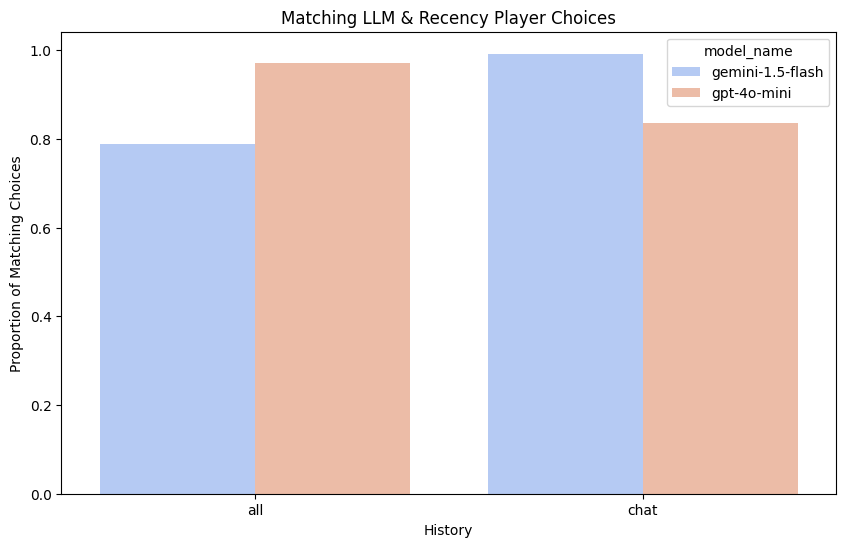

         model_name history_provided  recency_player_choice
0  gemini-1.5-flash              all               0.897377
1  gemini-1.5-flash             chat               0.895167
2       gpt-4o-mini              all               0.894500
3       gpt-4o-mini             chat               0.896667


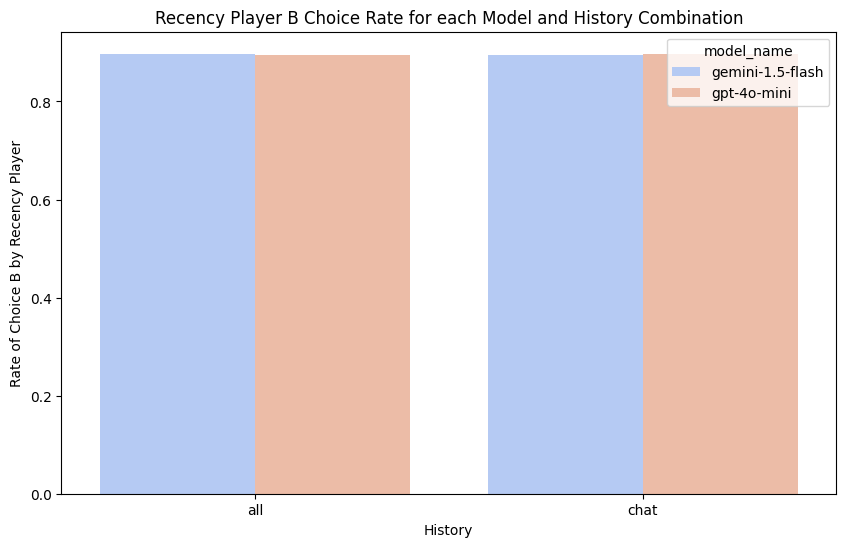

         model_name history_provided  fictitious_player_choice
0  gemini-1.5-flash              all                  0.480328
1  gemini-1.5-flash             chat                  0.476833
2       gpt-4o-mini              all                  0.462167
3       gpt-4o-mini             chat                  0.422167


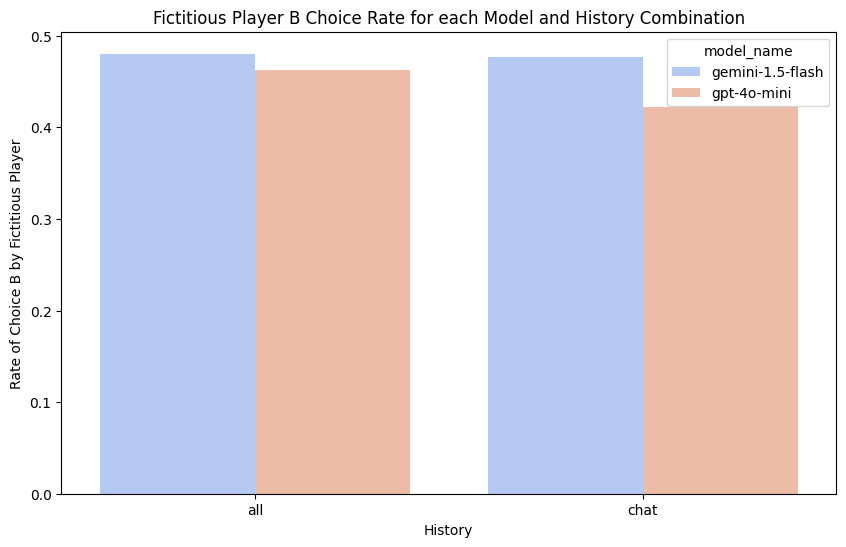

Proportion of Identical choices for LLM & Fictitious Player
         model_name history_provided  matching_choice
0  gemini-1.5-flash              all         0.514098
1  gemini-1.5-flash             chat         0.522667
2       gpt-4o-mini              all         0.516667
3       gpt-4o-mini             chat         0.519833


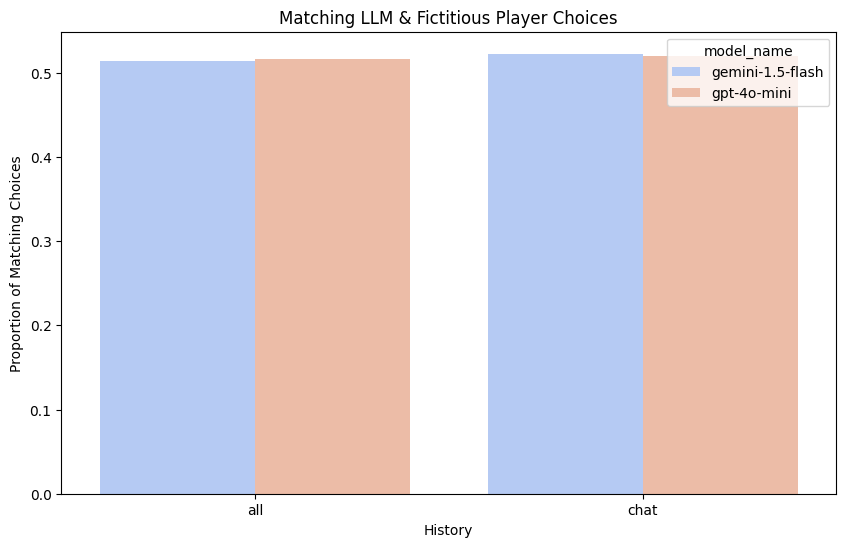

         model_name history_provided  wsls_player_choice
0  gemini-1.5-flash              all            0.919180
1  gemini-1.5-flash             chat            0.906333
2       gpt-4o-mini              all            0.906167
3       gpt-4o-mini             chat            0.922667


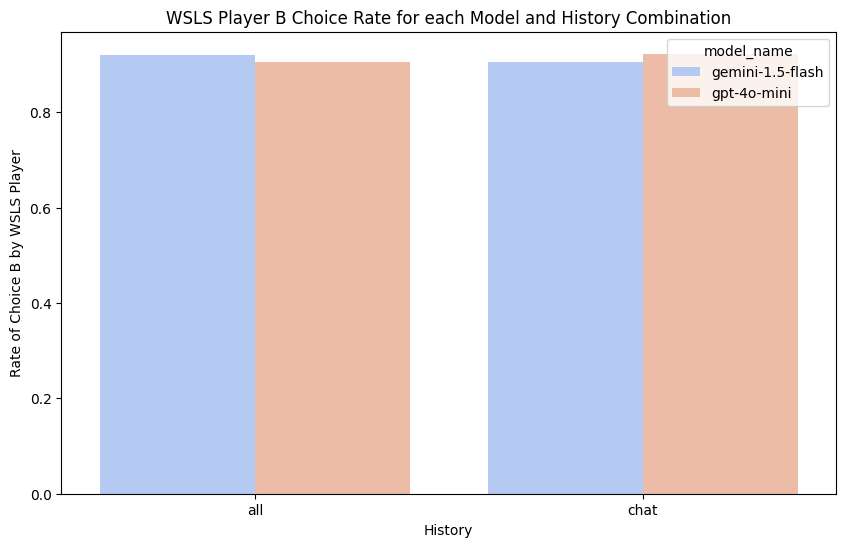

Proportion of Identical choices for LLM & WSLS Player
         model_name history_provided  matching_choice
0  gemini-1.5-flash              all         0.777541
1  gemini-1.5-flash             chat         0.984833
2       gpt-4o-mini              all         0.961333
3       gpt-4o-mini             chat         0.822667


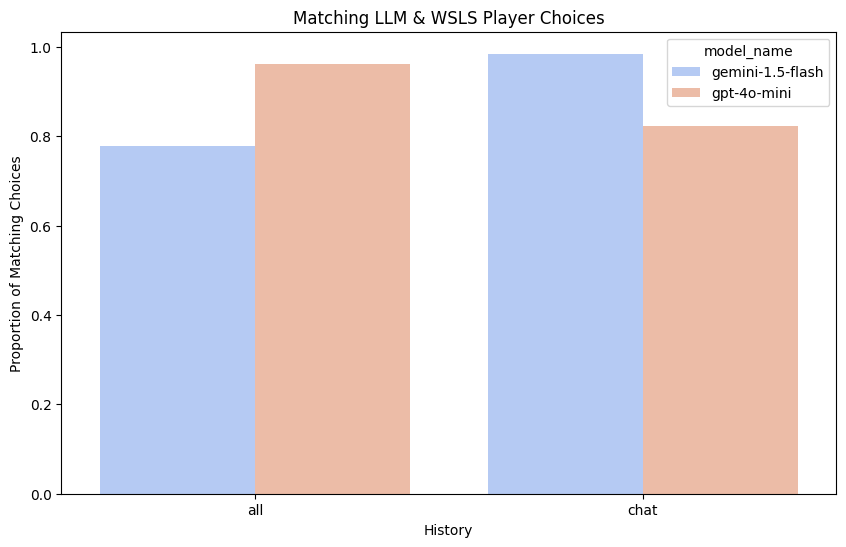

         model_name history_provided   outcome  recency_player_outcome  \
0  gemini-1.5-flash              all -0.063607               -0.083607   
1  gemini-1.5-flash             chat -0.085000               -0.085667   
2       gpt-4o-mini              all -0.100667               -0.097333   
3       gpt-4o-mini             chat -0.056333               -0.100667   

   fictitious_player_outcome  wsls_player_outcome  
0                  -0.048033            -0.076230  
1                  -0.036500            -0.087333  
2                  -0.060333            -0.098500  
3                  -0.071000            -0.107667  


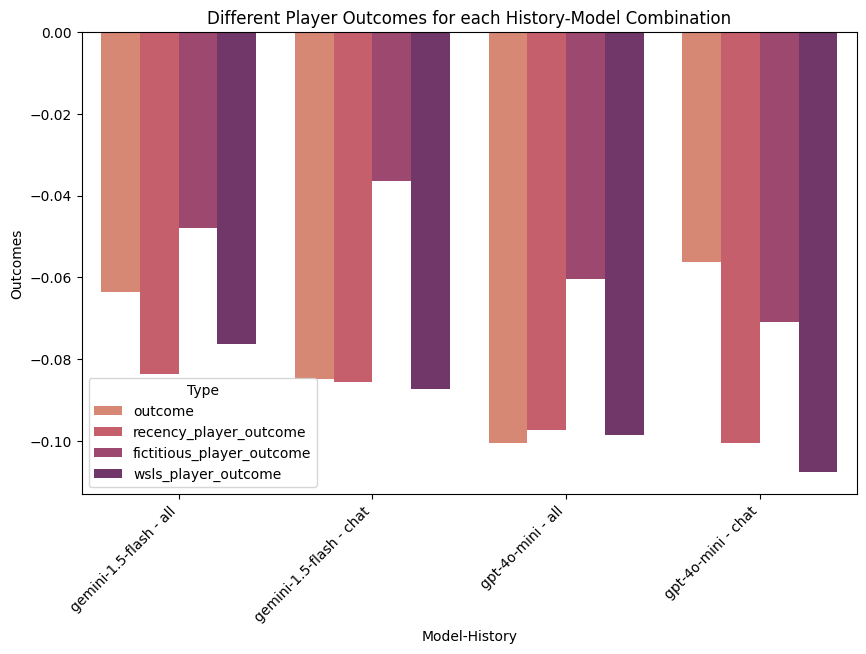


---------------------- Plotting Results for Experiment Number 2.0 ----------------------
Proportion of Identical choices for LLM & Recency Player
         model_name history_provided  matching_choice
0  gemini-1.5-flash              all         0.253000
1  gemini-1.5-flash             chat         0.884590
2       gpt-4o-mini              all         0.946885
3       gpt-4o-mini             chat         0.568167


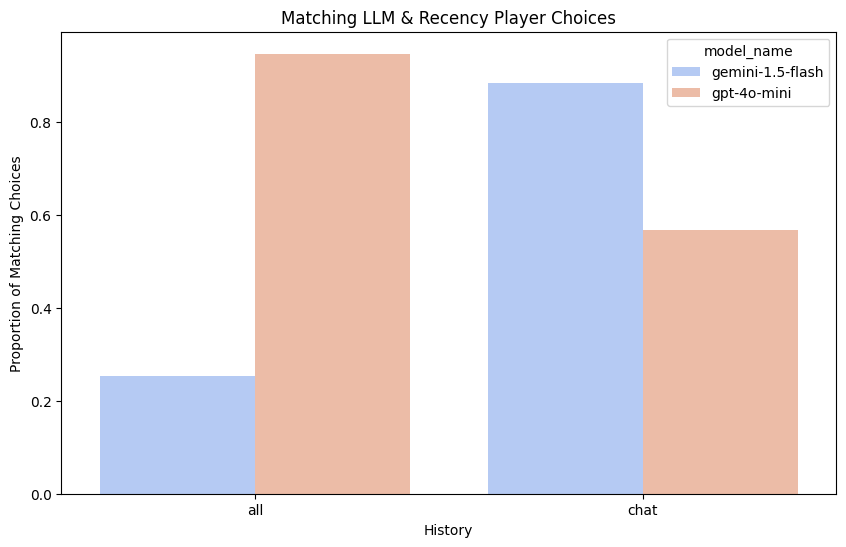

         model_name history_provided  recency_player_choice
0  gemini-1.5-flash              all               0.095667
1  gemini-1.5-flash             chat               0.107049
2       gpt-4o-mini              all               0.103115
3       gpt-4o-mini             chat               0.108833


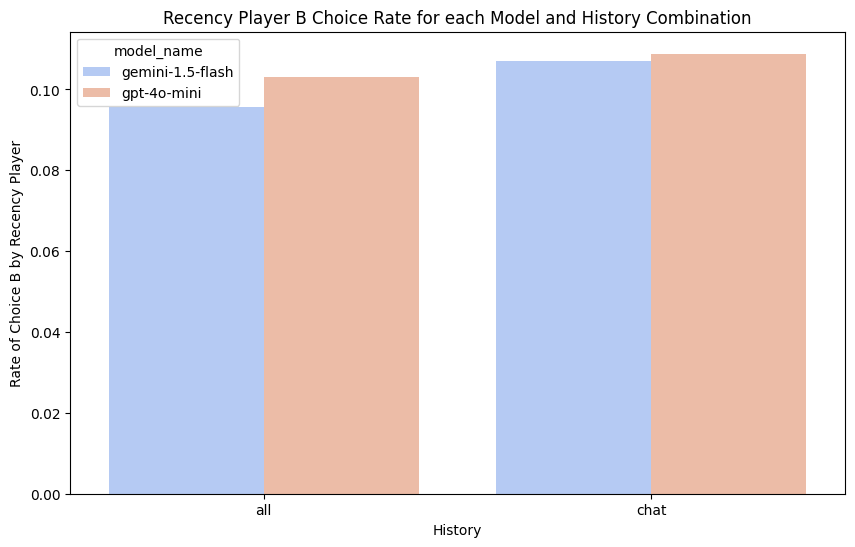

         model_name history_provided  fictitious_player_choice
0  gemini-1.5-flash              all                  0.490833
1  gemini-1.5-flash             chat                  0.572459
2       gpt-4o-mini              all                  0.532131
3       gpt-4o-mini             chat                  0.590500


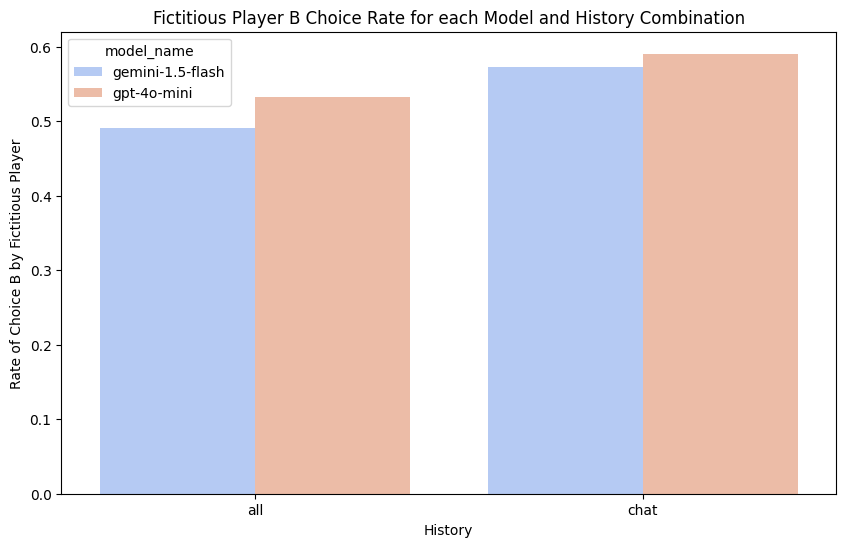

Proportion of Identical choices for LLM & Fictitious Player
         model_name history_provided  matching_choice
0  gemini-1.5-flash              all         0.550167
1  gemini-1.5-flash             chat         0.484754
2       gpt-4o-mini              all         0.520492
3       gpt-4o-mini             chat         0.454833


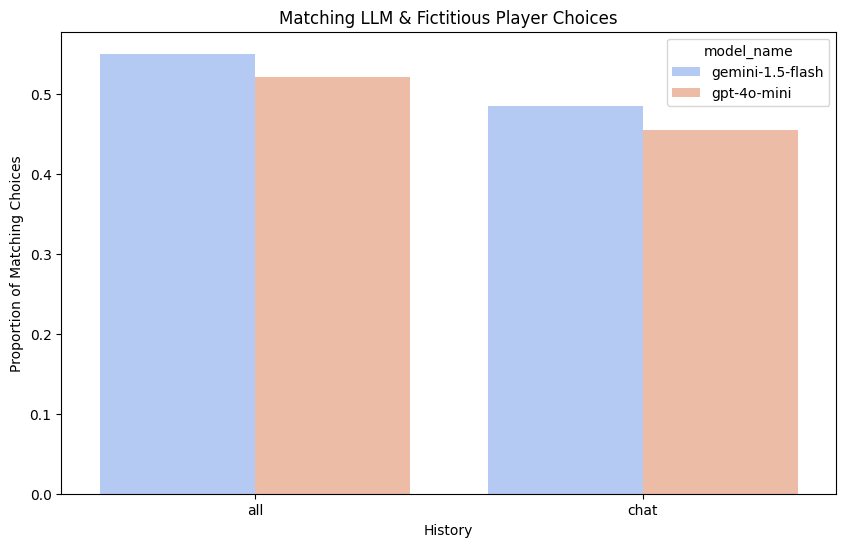

         model_name history_provided  wsls_player_choice
0  gemini-1.5-flash              all            0.243833
1  gemini-1.5-flash             chat            0.803934
2       gpt-4o-mini              all            0.884426
3       gpt-4o-mini             chat            0.592667


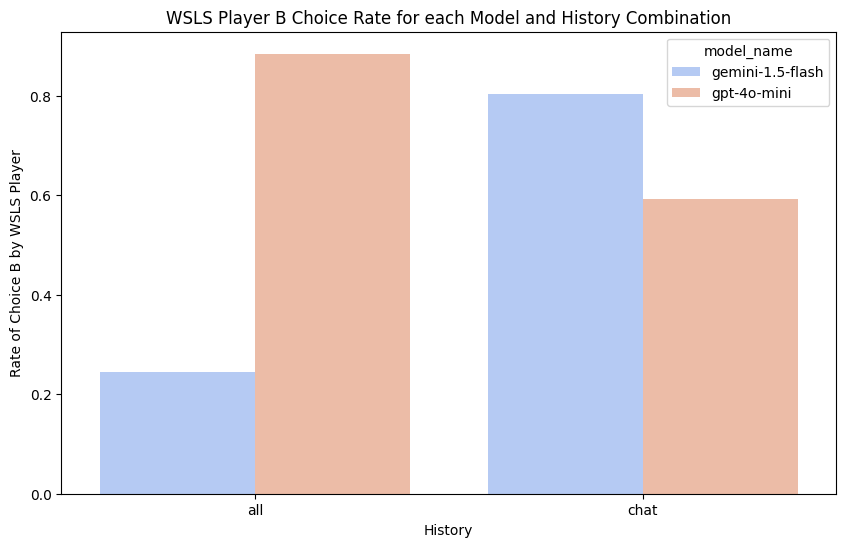

Proportion of Identical choices for LLM & WSLS Player
         model_name history_provided  matching_choice
0  gemini-1.5-flash              all         0.249500
1  gemini-1.5-flash             chat         0.406066
2       gpt-4o-mini              all         0.232131
3       gpt-4o-mini             chat         0.858667


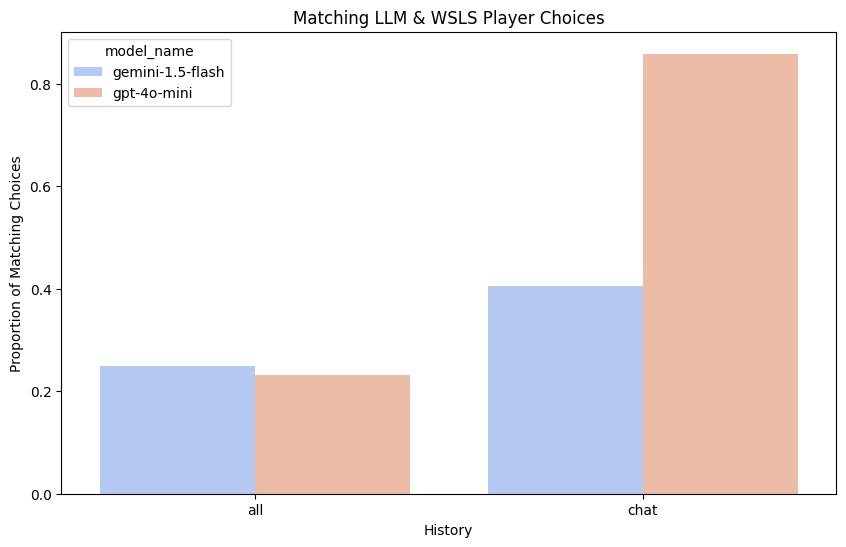

         model_name history_provided   outcome  recency_player_outcome  \
0  gemini-1.5-flash              all -0.012000                0.008833   
1  gemini-1.5-flash             chat  0.004098                0.001148   
2       gpt-4o-mini              all  0.000820               -0.014754   
3       gpt-4o-mini             chat  0.022833                0.004833   

   fictitious_player_outcome  wsls_player_outcome  
0                  -0.012333             0.011000  
1                   0.055082             0.113934  
2                   0.061148             0.082131  
3                   0.109833             0.078333  


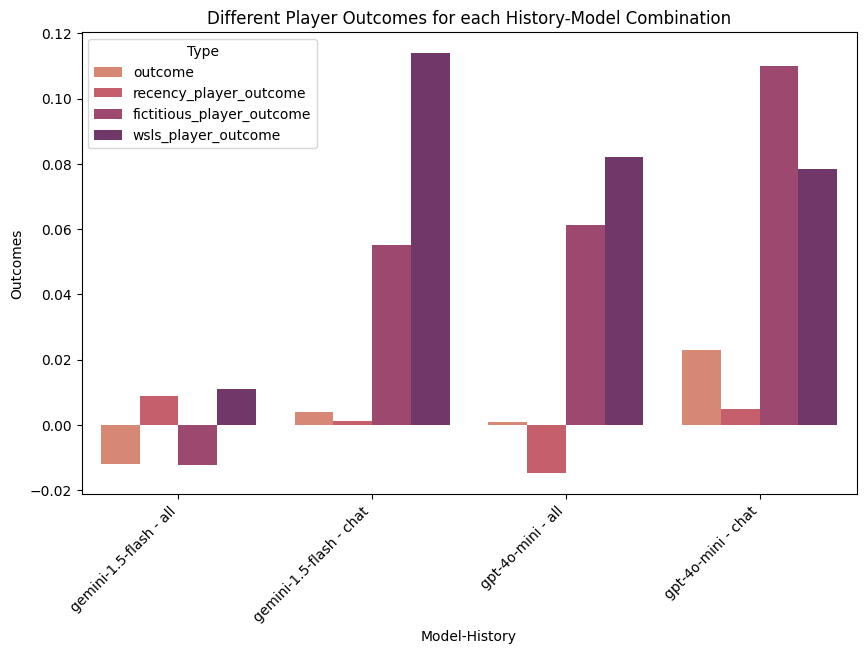


---------------------- Plotting Results for Experiment Number 3.0 ----------------------
Proportion of Identical choices for LLM & Recency Player
         model_name history_provided  matching_choice
0  gemini-1.5-flash              all         0.753667
1  gemini-1.5-flash             chat         0.733607
2       gpt-4o-mini              all         0.643833
3       gpt-4o-mini             chat         0.510492


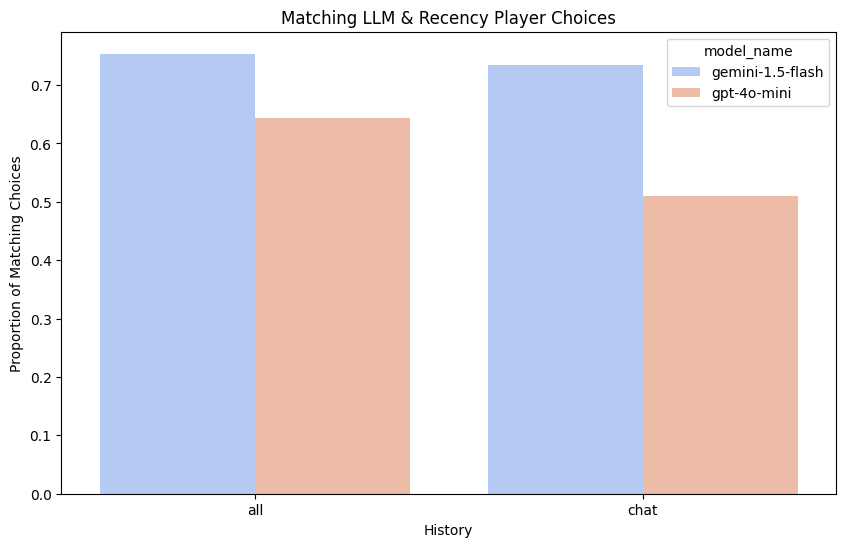

         model_name history_provided  recency_player_choice
0  gemini-1.5-flash              all               0.754833
1  gemini-1.5-flash             chat               0.747049
2       gpt-4o-mini              all               0.751500
3       gpt-4o-mini             chat               0.745902


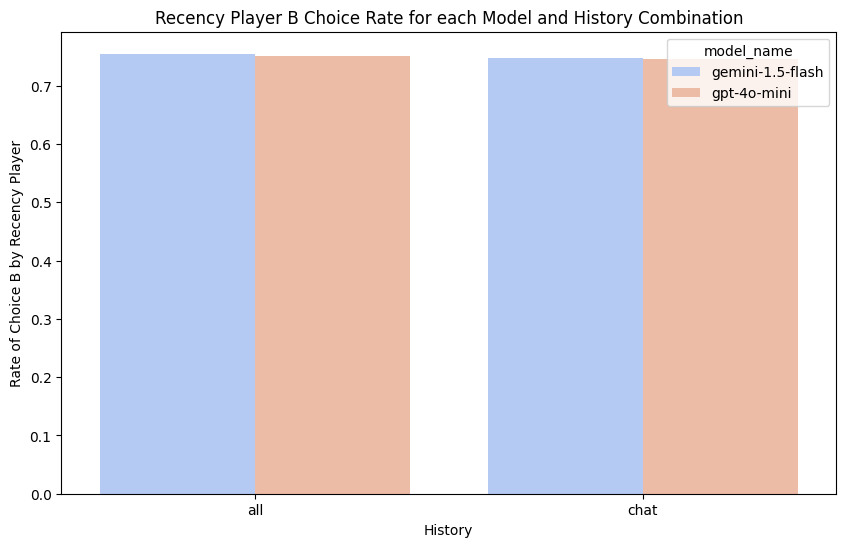

         model_name history_provided  fictitious_player_choice
0  gemini-1.5-flash              all                  0.990833
1  gemini-1.5-flash             chat                  0.987869
2       gpt-4o-mini              all                  0.990333
3       gpt-4o-mini             chat                  0.989836


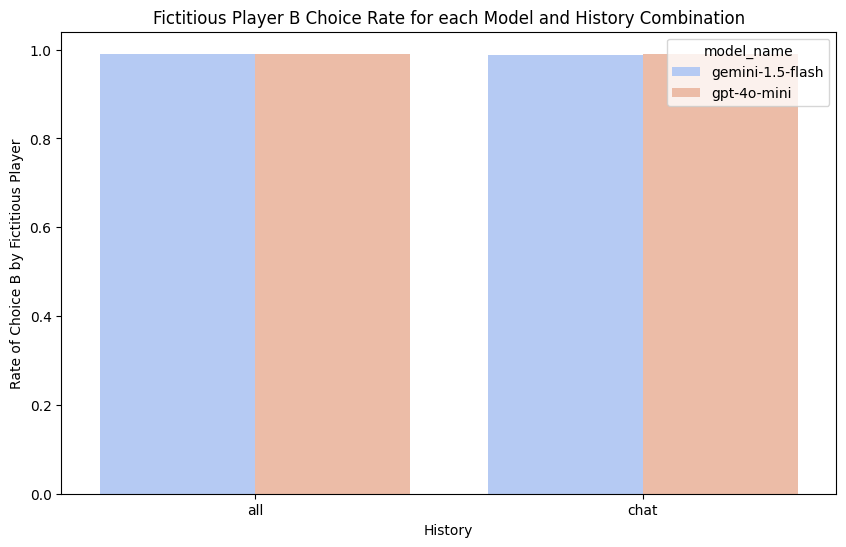

Proportion of Identical choices for LLM & Fictitious Player
         model_name history_provided  matching_choice
0  gemini-1.5-flash              all         0.987667
1  gemini-1.5-flash             chat         0.663934
2       gpt-4o-mini              all         0.700333
3       gpt-4o-mini             chat         0.506557


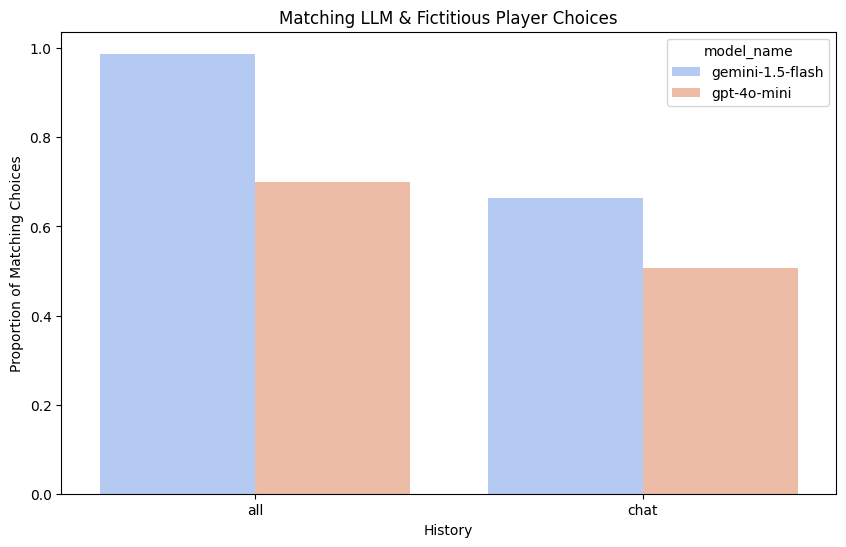

         model_name history_provided  wsls_player_choice
0  gemini-1.5-flash              all            0.506333
1  gemini-1.5-flash             chat            0.487541
2       gpt-4o-mini              all            0.494000
3       gpt-4o-mini             chat            0.495082


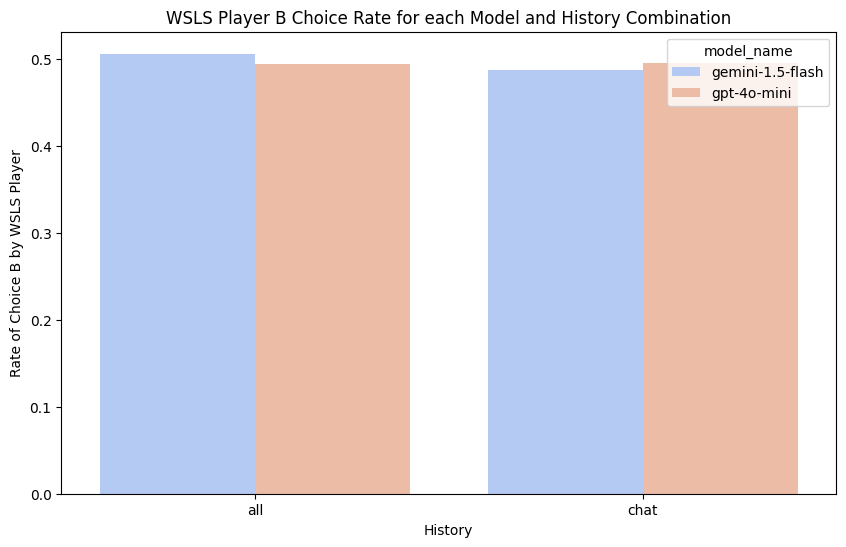

Proportion of Identical choices for LLM & WSLS Player
         model_name history_provided  matching_choice
0  gemini-1.5-flash              all         0.508500
1  gemini-1.5-flash             chat         0.816393
2       gpt-4o-mini              all         0.551333
3       gpt-4o-mini             chat         0.514098


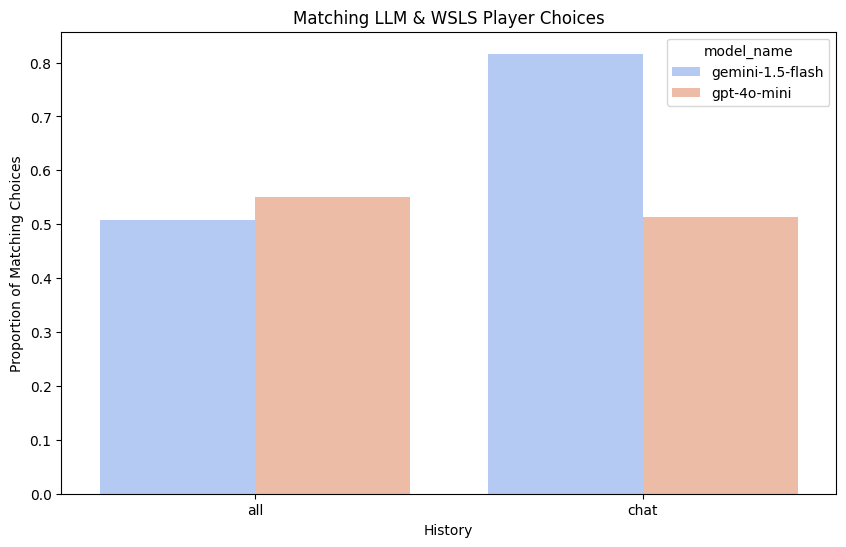

         model_name history_provided   outcome  recency_player_outcome  \
0  gemini-1.5-flash              all  4.530500                4.187500   
1  gemini-1.5-flash             chat  3.929508                4.065246   
2       gpt-4o-mini              all  4.004000                4.098500   
3       gpt-4o-mini             chat  3.717541                4.088361   

   fictitious_player_outcome  wsls_player_outcome  
0                   4.542000             3.808500  
1                   4.428689             3.674754  
2                   4.457500             3.718500  
3                   4.447869             3.720984  


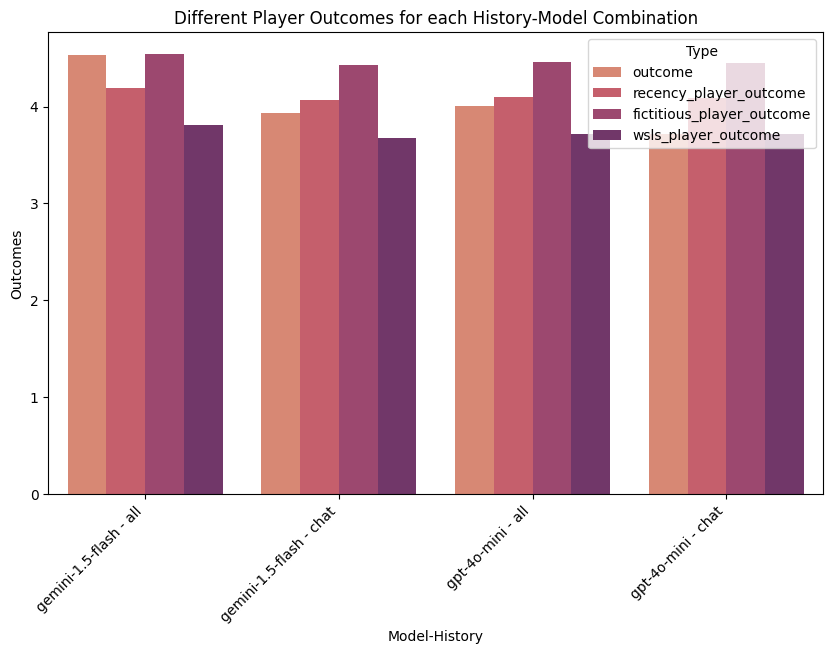


---------------------- Plotting Results for Experiment Number 4.0 ----------------------
Proportion of Identical choices for LLM & Recency Player
         model_name history_provided  matching_choice
0  gemini-1.5-flash              all         0.586885
1  gemini-1.5-flash             chat         0.990164
2       gpt-4o-mini              all         0.820656
3       gpt-4o-mini             chat         0.924333


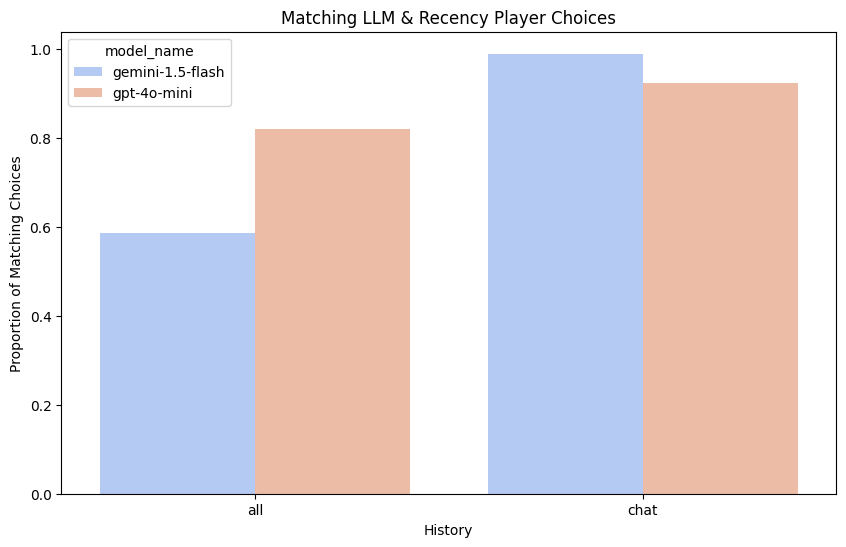

         model_name history_provided  recency_player_choice
0  gemini-1.5-flash              all               0.503770
1  gemini-1.5-flash             chat               0.495246
2       gpt-4o-mini              all               0.496885
3       gpt-4o-mini             chat               0.502833


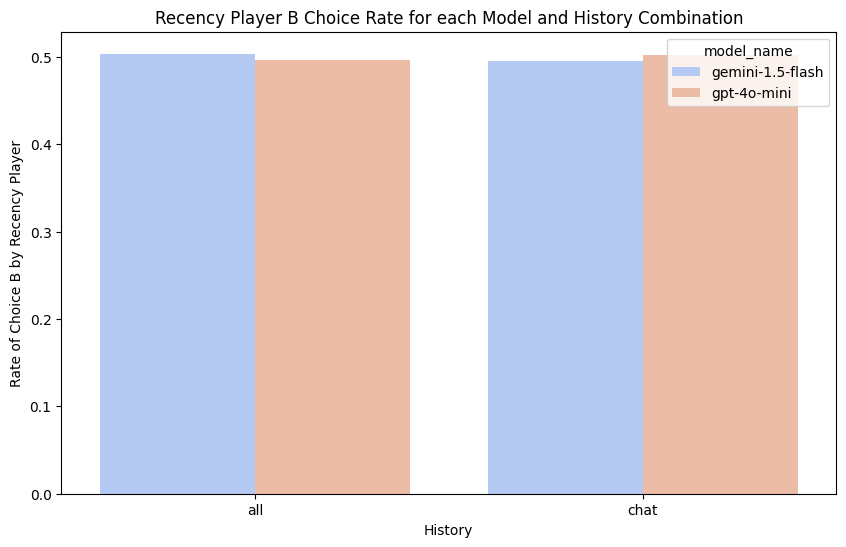

         model_name history_provided  fictitious_player_choice
0  gemini-1.5-flash              all                  0.856066
1  gemini-1.5-flash             chat                  0.827705
2       gpt-4o-mini              all                  0.810984
3       gpt-4o-mini             chat                  0.791333


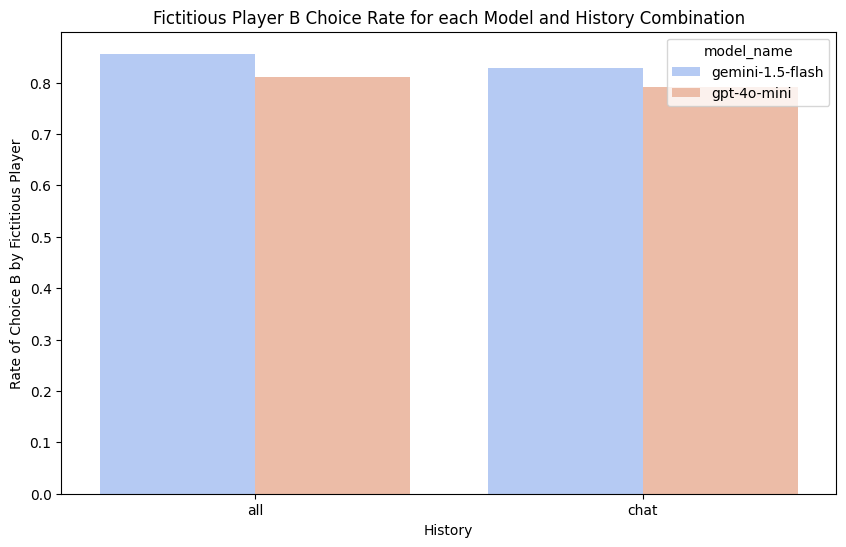

Proportion of Identical choices for LLM & Fictitious Player
         model_name history_provided  matching_choice
0  gemini-1.5-flash              all         0.829344
1  gemini-1.5-flash             chat         0.541967
2       gpt-4o-mini              all         0.677377
3       gpt-4o-mini             chat         0.532167


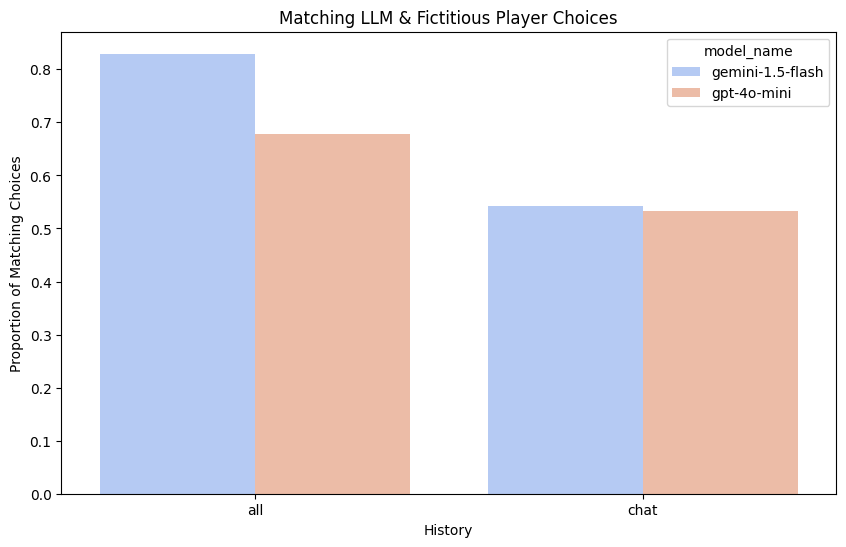

         model_name history_provided  wsls_player_choice
0  gemini-1.5-flash              all            0.503934
1  gemini-1.5-flash             chat            0.494426
2       gpt-4o-mini              all            0.497705
3       gpt-4o-mini             chat            0.504000


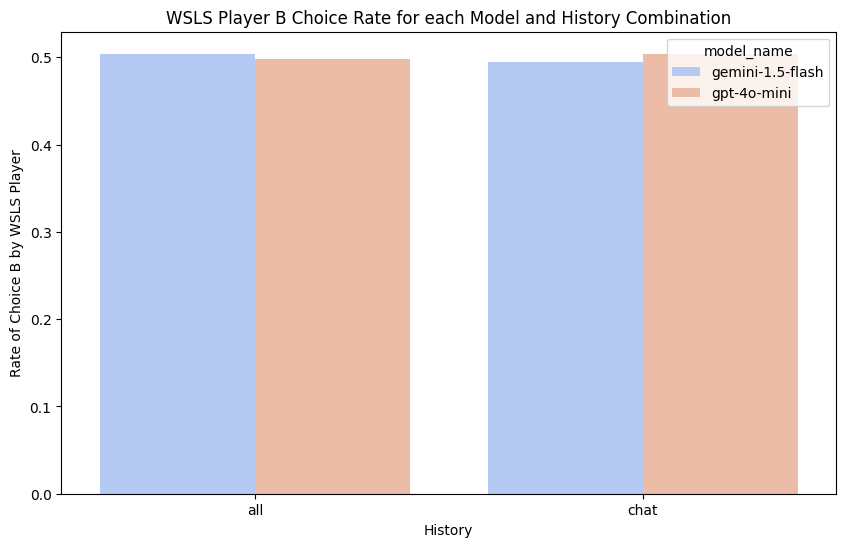

Proportion of Identical choices for LLM & WSLS Player
         model_name history_provided  matching_choice
0  gemini-1.5-flash              all         0.586066
1  gemini-1.5-flash             chat         0.990656
2       gpt-4o-mini              all         0.819836
3       gpt-4o-mini             chat         0.923167


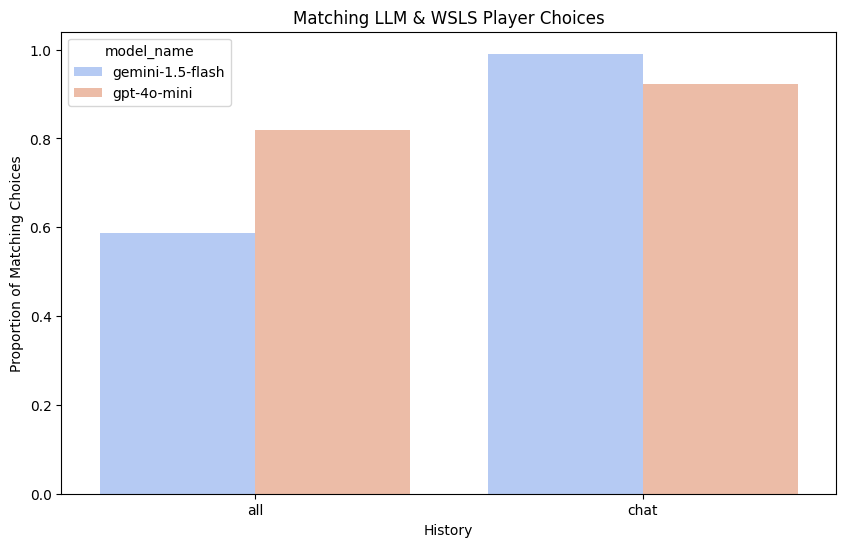

         model_name history_provided   outcome  recency_player_outcome  \
0  gemini-1.5-flash              all  3.911148                3.437049   
1  gemini-1.5-flash             chat  3.489508                3.487541   
2       gpt-4o-mini              all  3.631148                3.546885   
3       gpt-4o-mini             chat  3.453000                3.507667   

   fictitious_player_outcome  wsls_player_outcome  
0                   3.831803             3.442951  
1                   3.799344             3.494754  
2                   3.801311             3.544262  
3                   3.795000             3.514667  


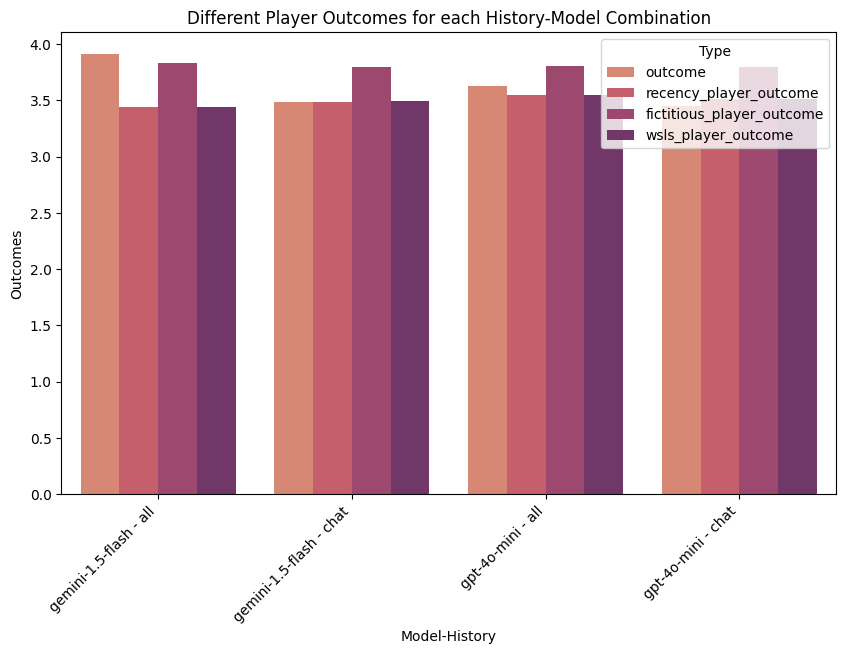

In [44]:
for exp_num in sorted(df['prob_id'].unique()):
    print('')
    plot_benchmark_results(df, exp_num, heatmap=False)

Fictitious Player - Wins: 0.6115702479338843, Draws:  0.04648760330578512
Recency Player - Wins: 0.4535123966942149,  Draws: 0.13119834710743802
WSLS Player - Wins: 0.4049586776859504, Draws: 0.09400826446280992


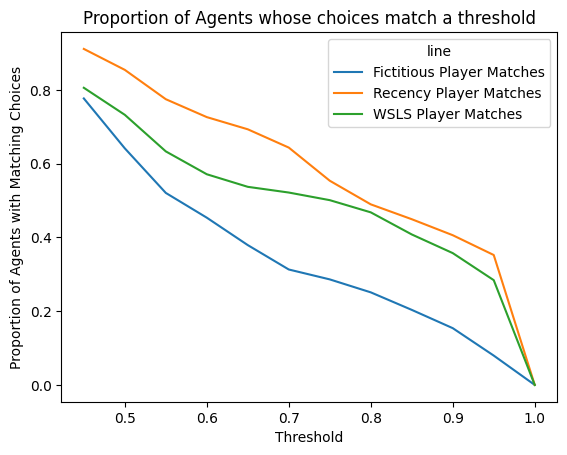

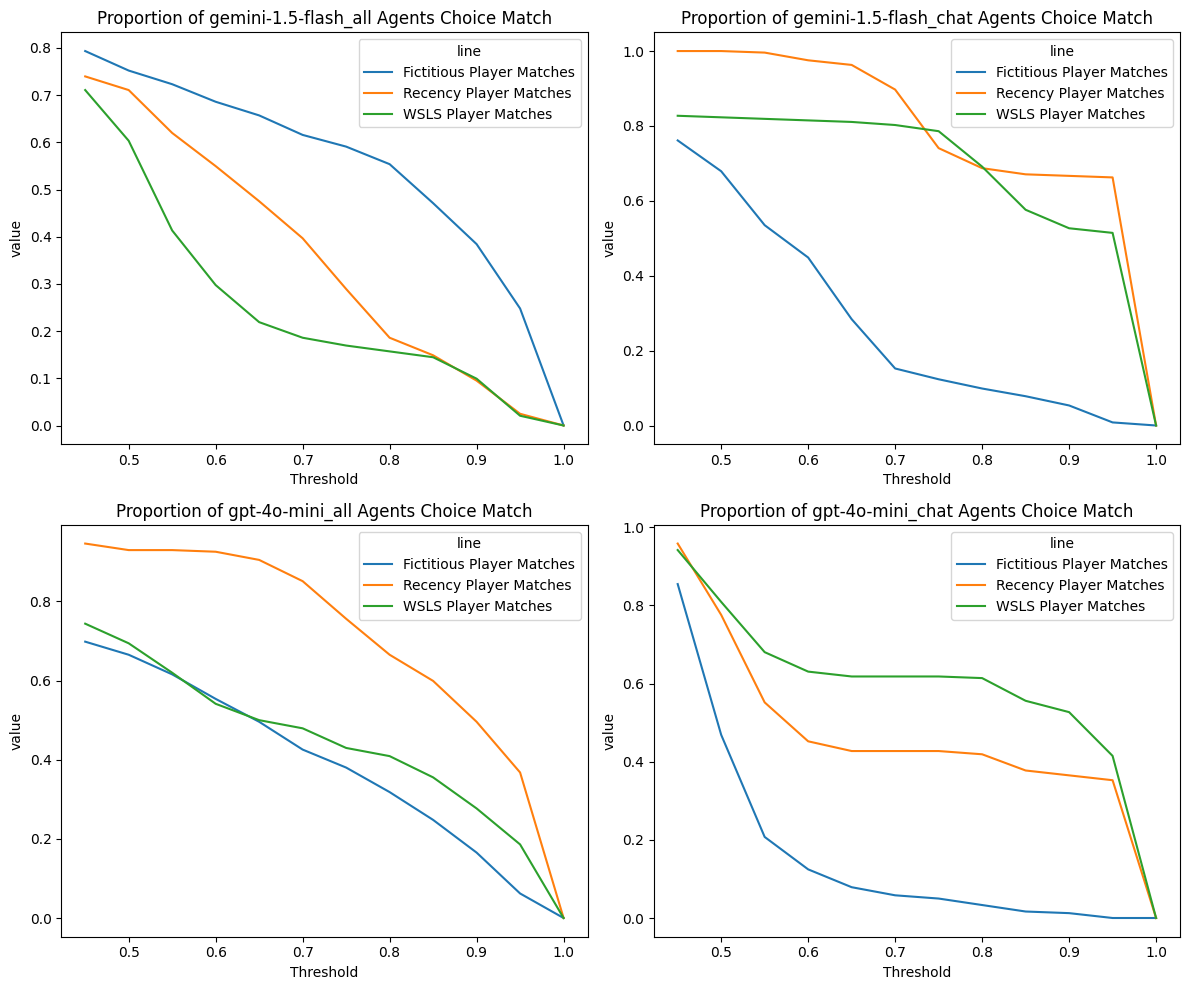

In [48]:
thresholds = [0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]
# for exp_num in sorted(df['prob_id'].unique()):
#     print('')
#     agent_wise_comparisons(df, exp_num, thresholds)
agent_wise_comparisons(df, 1.0, thresholds, all_exps=True)

In [52]:
for exp_num in sorted(df['prob_id'].unique()):
    exp = df[df['prob_id'] == exp_num]
    rec_wsls_match = exp[(exp['recency_player_choice'] == exp['wsls_player_choice'])]
    print(f'Experiment {exp_num}:')
    print(f'Recency-WSLS Match Rate: {len(rec_wsls_match)/len(exp)}')
    for model in exp['model_name'].unique():
      for history in exp['history_provided'].unique():
        if model == 'gpt-4o-mini' and history == 'None':
          continue
        df_filtered = exp[(exp['model_name'] == model) & (exp['history_provided'] == history)]
        rec_no_wsls_match = df_filtered[(df_filtered['recency_choice_match'] == True) & (df_filtered['wsls_choice_match']==False)]
        wsls_no_rec_match = df_filtered[(df_filtered['recency_choice_match'] == False) & (df_filtered['wsls_choice_match']==True)]
        print(f'Model: {model}-{history}, Critical Recency Choices: {len(rec_no_wsls_match)}, Critical WSLS Choices: {len(wsls_no_rec_match)}')

Experiment 1.0:
Recency-WSLS Match Rate: 0.9777593360995851
Model: gemini-1.5-flash-all, Critical Recency Choices: 118, Critical WSLS Choices: 49
Model: gemini-1.5-flash-chat, Critical Recency Choices: 70, Critical WSLS Choices: 29
Model: gpt-4o-mini-all, Critical Recency Choices: 72, Critical WSLS Choices: 22
Model: gpt-4o-mini-chat, Critical Recency Choices: 127, Critical WSLS Choices: 49
Experiment 2.0:
Recency-WSLS Match Rate: 0.4652479338842975
Model: gpt-4o-mini-all, Critical Recency Choices: 4582, Critical WSLS Choices: 222
Model: gpt-4o-mini-chat, Critical Recency Choices: 598, Critical WSLS Choices: 2341
Model: gemini-1.5-flash-all, Critical Recency Choices: 469, Critical WSLS Choices: 448
Model: gemini-1.5-flash-chat, Critical Recency Choices: 3600, Critical WSLS Choices: 681
Experiment 3.0:
Recency-WSLS Match Rate: 0.5979752066115702
Model: gemini-1.5-flash-chat, Critical Recency Choices: 1075, Critical WSLS Choices: 1580
Model: gemini-1.5-flash-all, Critical Recency Choices

In [49]:
print('Assesments for Recency Player')
#for exp_num in sorted(df['prob_id'].unique()):
#    print('')
#    chi_square_test(df, exp_num, strategy_name='recency_player_choice')
chi_square_test(df, 1.0, strategy_name='recency_player_choice', all_exps=True)

print('Assesments for Fictitious Player')
#for exp_num in sorted(df['prob_id'].unique()):
#    print('')
#    chi_square_test(df, exp_num, strategy_name='fictitious_player_choice')

chi_square_test(df, exp_num, strategy_name='fictitious_player_choice', all_exps=True)
print('Assesments for WSLS Player')
#for exp_num in sorted(df['prob_id'].unique()):
#    print('')
#    chi_square_test(df, exp_num, strategy_name='wsls_player_choice')
chi_square_test(df, exp_num, strategy_name='wsls_player_choice', all_exps=True)

Assesments for Recency Player
-------------- Test for gemini-1.5-flash-all -------------- 
Chi-Square Statistic: 523.7612556055733, P-Value: 6.430378575056785e-116, Cramérs V: 0.14711569287856205

-------------- Test for gemini-1.5-flash-chat -------------- 
Chi-Square Statistic: 15400.355868042701, P-Value: 0.0, Cramérs V: 0.7960901335542967

-------------- Test for gpt-4o-mini-all -------------- 
Chi-Square Statistic: 11379.729413825744, P-Value: 0.0, Cramérs V: 0.6857381079081338

-------------- Test for gpt-4o-mini-chat -------------- 
Chi-Square Statistic: 4088.1931036503265, P-Value: 0.0, Cramérs V: 0.4118671735113107

Assesments for Fictitious Player
-------------- Test for gemini-1.5-flash-all -------------- 
Chi-Square Statistic: 1187.4893216819426, P-Value: 3.193231347716149e-260, Cramérs V: 0.22151705731404073

-------------- Test for gemini-1.5-flash-chat -------------- 
Chi-Square Statistic: 80.15371977049445, P-Value: 3.4638595932188484e-19, Cramérs V: 0.05743262998017852

## Wavy Recency

In [ ]:
def calculate_wavy_recency(df: pd.DataFrame, rare_choice: str ='B', k_max: int = 20):
    df['rare_event'] = df.apply(lambda x: x['b2'] if x['pb1'] > 0.5 else x['b1'], axis=1)
    rare_choice_counts = np.zeros(k_max)
    num_rare_events = 0
    for trial_id, group in df.groupby('trial_id'):
        group = group.reset_index(drop=True)
        rare_choice_indices = group.index[(group['outcome'] == group['rare_event']) | (group['alternative'] == group['rare_event'])].tolist()
        rare_choice_indices = [i for i in rare_choice_indices if i <= 80]
        for idx in rare_choice_indices:
            for k in range(1, min(k_max + 1, len(group) - idx)):
                if group.loc[idx + k, 'choice'] == rare_choice:
                    rare_choice_counts[k - 1] += 1
        num_rare_events += len(rare_choice_indices)
    probabilities = rare_choice_counts / num_rare_events
    return probabilities

def plot_wavy_recency(df: pd.DataFrame, rare_choice: str ='B', k_max: int = 20):
    exp = df[df['prob_id'] == exp_num]
    print(f'---------------------- Wavy Recency for Experiment Number {exp_num} ----------------------')
    plt.figure(figsize=(10, 6))
    for model in exp['model_name'].unique():
        for history in exp['history_provided'].unique():
          if model == 'gpt-4o-mini' and history == 'None':
            continue
          df_filtered = exp[(exp['model_name'] == model) & (exp['history_provided'] == history)]
          probabilities = calculate_wavy_recency(df_filtered, rare_choice='B', k_max=k_max)
          plt.plot(range(1, k_max + 1), probabilities, marker='o', label=f'{model} - {history}')

    plt.title('Wavy Recency Effect: P(LotteryChoice at T+k | RareEvent at T)')
    plt.xlabel('K')
    plt.ylabel('Probability of Lottery Choice at T+k')
    plt.grid(True)
    plt.legend()
    plt.show()


---------------------- Wavy Recency for Experiment Number 1.0 ----------------------


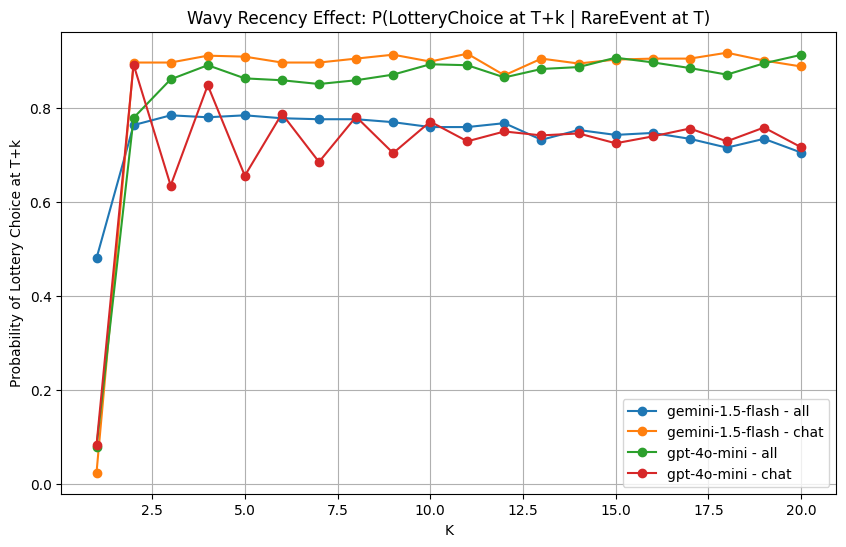


---------------------- Wavy Recency for Experiment Number 2.0 ----------------------


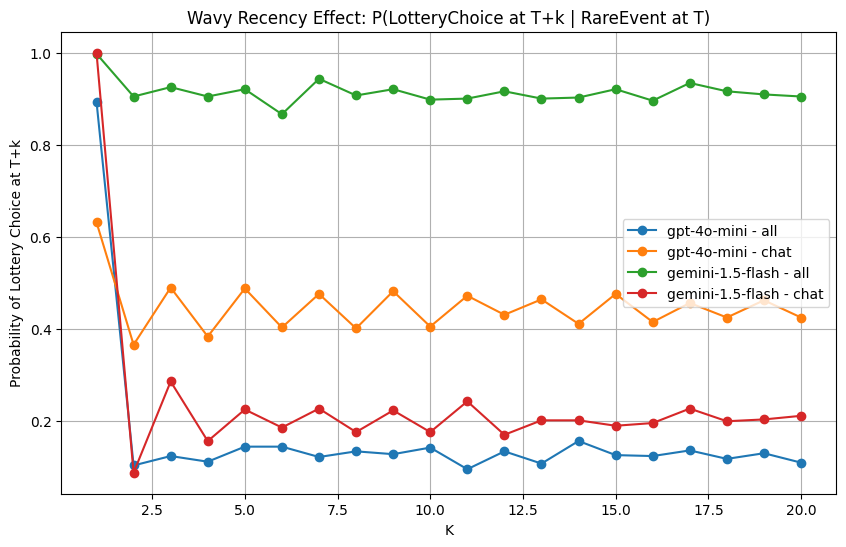


---------------------- Wavy Recency for Experiment Number 3.0 ----------------------


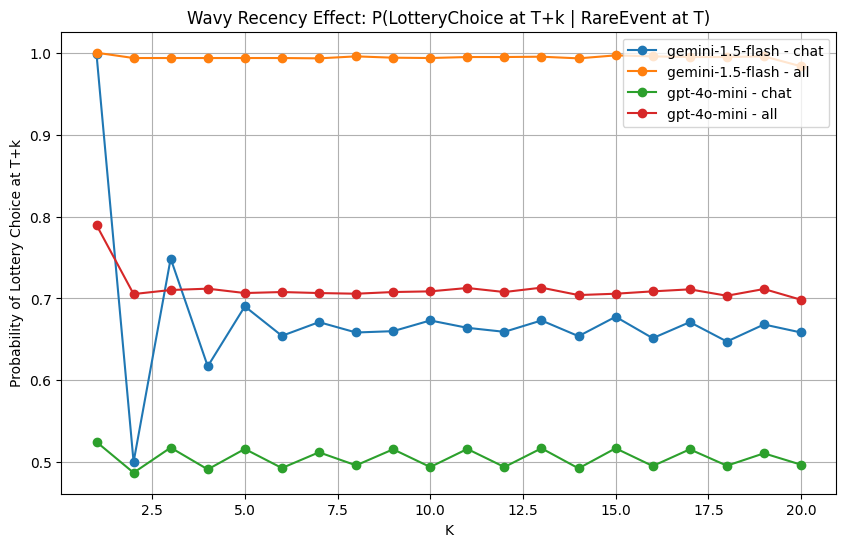


---------------------- Wavy Recency for Experiment Number 4.0 ----------------------


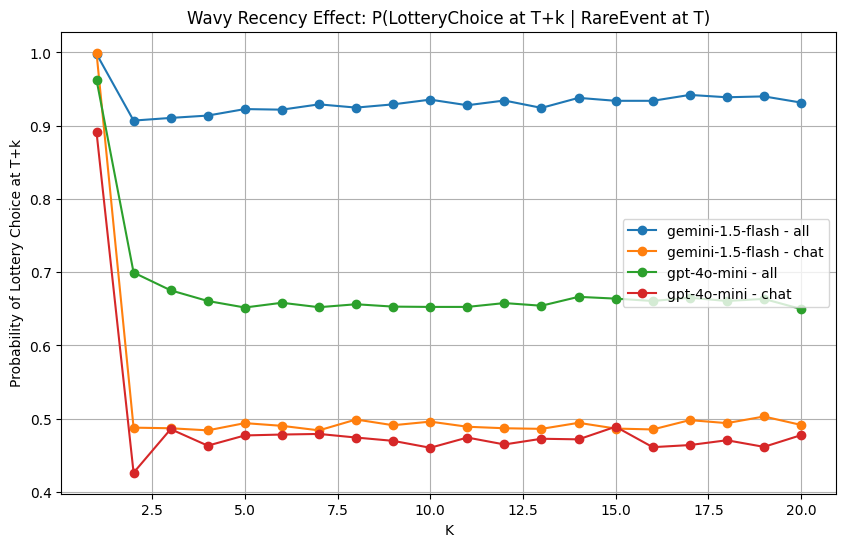

In [ ]:
for exp_num in sorted(df['prob_id'].unique()):
    print('')
    plot_wavy_recency(df, rare_choice='B', k_max=20)

In [ ]:
!jupyter nbconvert --to html Research_Project_Analysis.ipynb


[NbConvertApp] Converting notebook Research_Project_Analysis.ipynb to html
[NbConvertApp] Writing 3312330 bytes to Research_Project_Analysis.html
